# H&M Retail Sales Analysis - Data Preprocessing and EDA
---

# Table of Contents

>[H&M Retail Sales Analysis - Data Preprocessing and EDA](#scrollTo=acf997f9)

>[Table of Contents](#scrollTo=d-sDxYsGvso4)

>[Import Packages and Set Path to Data](#scrollTo=c7996c41-da1f-4090-8c60-3f916c8b1f2a)

>[GPU and cuDF set up](#scrollTo=XcC586NEfMBA)

>[Data Cleaning](#scrollTo=4b480bf6)

>>[Articles](#scrollTo=99b40ef1)

>>>[Shapes, missing values, and duplicates](#scrollTo=593413b7)

>>>[Code and name pairs](#scrollTo=3021ea07)

>>>>[product_code and prod_name](#scrollTo=084ad75d)

>>>>[product_type_no and product_type_name](#scrollTo=c10d3541)

>>>>[department_no and department_name](#scrollTo=35f367df)

>>>>[section_no and section_name](#scrollTo=7c050975)

>>>[Dropping code columns](#scrollTo=c21bca0a)

>>[Customers](#scrollTo=ce0f3ee6)

>>>[Shape, missing values, and duplicates](#scrollTo=2a966407)

>>>[Imputing missing values](#scrollTo=b986cd5b-f345-4f3f-8576-68ca61795472)

>>[Transactions](#scrollTo=af4d1239)

>>>[Shape, missing values, and duplicates](#scrollTo=0257159a-ff3d-4aa1-92cd-dae6f40118f1)

>>>[Data types](#scrollTo=c88229f6-2a13-46ab-a9c0-7da296efc943)

>>[Merging the dataset](#scrollTo=68e01307-0c6b-4dac-9c47-5166f047ffa7)

>[Preliminary EDA](#scrollTo=49766a5a-c898-4f90-ab07-052af67efc90)

>>[Numeric Columns](#scrollTo=d131ace1-eef6-4695-8042-6e14d514eb1c)

>>[N_transactions by product category](#scrollTo=f61ce64a-7b37-4862-8ae1-e3ec5bc533a4)

>>[Time Series](#scrollTo=eca4bcf2-47c5-4e85-bfc8-c179eda5a89e)

>[EDA - Product Analysis and Preprocessing](#scrollTo=ebe40fe1-afef-436b-b499-1184841a80ba)

>>[Product Categories](#scrollTo=2cbaacf2-8dbb-4c3c-b1ae-ad1bf4b25523)

>>>[index_group_name v.s. index_name](#scrollTo=d0308894-c06e-45b4-9156-fc2066354dfe)

>>>[Product_group_name and product_type_name](#scrollTo=de5954ed-6c15-47e2-919e-619411d4a86c)

>>[Appearance - colours and graphical appearances](#scrollTo=4c7fd6ac-b740-4f65-a74e-0adfb4894c34)

>>[Preprocessing](#scrollTo=83b90b78-7005-459a-a7e0-b711a7446f04)

>[EDA - Sales Analysis (Time Series)](#scrollTo=4a454847-8f17-4b19-ae44-f4feb9346329)

>>>[Analyzing top performing products](#scrollTo=d541b378-694b-4e1f-9bd0-eb9388419618)

>>>[Analyzing selected random products](#scrollTo=0d91c177-5303-4bc7-80e9-99dcbaae5060)

>[Feature Engineering](#scrollTo=a13c9425-2323-4ecd-9fc7-666629fbaea8)

>>[Target Variable - Trending](#scrollTo=2852ffdf-93f3-4e43-8144-8a824c400cba)

>>[Product Table Aggregation](#scrollTo=5c1ee0d6-a642-4fd5-8fc4-de63d1ad1648)

>>[Input Features](#scrollTo=dbb87478-5f22-4ae1-940d-c7fcc9505757)

>>>[One-Hot Encoding](#scrollTo=ce09d2e3-48b0-4bf5-b428-23b89c2ffa25)

>>>[Vectorization](#scrollTo=c6fa4872-87e6-4e87-9e08-949ebe346ee7)

>[Baseline Modeling & Evaluation](#scrollTo=47aeec69-59c3-419f-b5f3-2bd525e1901b)

>>[Logistic Regression - without description and product name](#scrollTo=b2d3d23f-2c1d-490c-9f01-9efce0214f64)

>>[Logistic Regression - with product name and detailed description](#scrollTo=07cf0026-06c1-4df8-a45f-f23e10b429b2)

>>[Imbalanced Learning](#scrollTo=ba478dae-4370-45c0-9e2c-66b18012dd9b)

>>>[SMOTE](#scrollTo=ecce1aa9-ced6-43b3-9607-29322efa1987)

>>[Feature Importance](#scrollTo=4e4c87b5-e524-4f3e-ba29-dfeab398d31c)

>>>>>>[Top 20 detailed description](#scrollTo=0081c728-f5c2-439b-929f-362a5341dd6c)

>[Advanced ML Modelling](#scrollTo=c572179f-7fda-4e7b-b92c-a8388f183894)

>>[Pipeline](#scrollTo=d459e9c6-9e13-4601-888b-00850ea61115)

>>[SVM](#scrollTo=235325af-4abe-49b6-8fa1-b4041bc22194)

>>[XGBoost](#scrollTo=8c2429b8-0e45-4f5a-908b-9566ea11635f)

>>[Random Forest](#scrollTo=PdrGB-Ijz7xI)



# Import Packages and Set Path to Data

There are three tables within this [Kaggle dataset](https://www.kaggle.com/competitions/h-and-m-personalized-fashion-recommendations/data?select=transactions_train.csv):
- `articles`: Detailed metadata for each article_id (product) available for purchase.
- `customers`: metadata for each customer_id in dataset.
- `transactions`: The purchases each customer for each date, as well as additional information. Duplicate rows correspond to multiple purchases of the same item.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from statsmodels.regression import linear_model
# import statsmodels.api as sm
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import warnings
import joblib
from tqdm import tqdm

#a bunch of imports!
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


# Text Processing
import string
import nltk
import re
# from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


# Lemmatization

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Imbalance learning
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Model Evaluation
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

warnings.filterwarnings('ignore')
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# plt.rcParams['figure.figsize']=(5,3.5)

**Google colab only**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = '/content/drive/MyDrive/BrainStation/DS/Capstone/'

---

# GPU and cuDF set up

We've noticed that some of our dataset is pretty large. Hence it might cost a lot of time to just read them in. We would solve that by using `cuDF`.

Let's try reading with pandas first:

In [ ]:
# %%time
# transactions = pd.read_csv(path + 'data/transactions_train.csv')
# transactions.shape

As we can see, the transactions data is very large, so it takes a lot of time to just read. We can try using GPU with `cudf`. We need to run this cell below (Uncomment and run) first to download dependencies from RAPIDS to be able to import `cudf`.

**Note**: this step might restart your kernel, so be sure to import packages and set up file path again!

In [4]:
# This get the RAPIDS-Colab install files and test check your GPU.
# !git clone https://github.com/rapidsai/rapidsai-csp-utils.git
# !python rapidsai-csp-utils/colab/env-check.py
# !python rapidsai-csp-utils/colab/pip-install.py

In [4]:
import cudf

In [ ]:
%%time
transactions = cudf.read_csv(path + 'data/transactions_train.csv')
transactions.shape

CPU times: user 2.77 s, sys: 1.77 s, total: 4.55 s
Wall time: 5.72 s


(31788324, 5)

We can definitely see a faster processing with cuDF compared to pandas! We would apply this only to the transactions data as it is the largest one to avoid maxing out our GPU RAM.

# Data Cleaning

In this part, we will do data preprocessing on the H&M Sales data in order to better identify quality issues, and feature engineering opportunities, and to have further observations about the data:
- Looking individually into the 3 tables for preprocessing.
- Drop columns that might fall out of scope for this project.
- Merge them into a final dataframe for the further EDA.

---

## Articles

In [ ]:
articles = pd.read_csv(path + 'data/articles.csv')

In [ ]:
articles.head(3)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


### Shapes, missing values, and duplicates

`articles` is the product table for this dataset. First we look at the shape, NANs, and duplicated of this table.

In [ ]:
articles.shape

(105542, 25)

There are more than 100k available products (rows), and 25 columns.

In [ ]:
articles.isna().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

Here we can see that the only column with missing values is detail_desc, which is around 0.4% of the total rows.

In [ ]:
articles[articles['detail_desc'].isna()==1]

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
1467,351332007,351332,Marshall Lace up Top,252,Sweater,Garment Upper body,1010018,Treatment,7,Grey,...,Jersey Fancy DS,D,Divided,2,Divided,58,Divided Selected,1005,Jersey Fancy,NaN
2644,420049002,420049,OL TAGE PQ,87,Boots,Shoes,1010016,Solid,13,Beige,...,Premium Quality,C,Ladies Accessories,1,Ladieswear,64,Womens Shoes,1020,Shoes,NaN
2645,420049003,420049,OL TAGE PQ,87,Boots,Shoes,1010016,Solid,23,Dark Yellow,...,Premium Quality,C,Ladies Accessories,1,Ladieswear,64,Womens Shoes,1020,Shoes,NaN
2742,426199002,426199,Ellen Shortie Daisy Low 3p,286,Underwear bottom,Underwear,1010016,Solid,9,Black,...,Casual Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear",NaN
2743,426199010,426199,Ellen Shortie Daisy Low 3p,286,Underwear bottom,Underwear,1010017,Stripe,8,Dark Grey,...,Casual Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67838,752458001,752458,Poissy boho dress,265,Dress,Garment Full body,1010007,Embroidery,10,White,...,Dress,A,Ladieswear,1,Ladieswear,6,Womens Casual,1013,Dresses Ladies,NaN
72720,768842001,768842,Andrews set,270,Garment Set,Garment Full body,1010017,Stripe,10,White,...,Baby Boy Woven,G,Baby Sizes 50-98,4,Baby/Children,41,Baby Boy,1006,Woven/Jersey/Knitted mix Baby,NaN
72721,768842004,768842,Andrews set,270,Garment Set,Garment Full body,1010004,Check,73,Dark Blue,...,Baby Boy Woven,G,Baby Sizes 50-98,4,Baby/Children,41,Baby Boy,1006,Woven/Jersey/Knitted mix Baby,NaN
93144,856985001,856985,Pogo rope,67,Belt,Accessories,1010016,Solid,12,Light Beige,...,Belts,C,Ladies Accessories,1,Ladieswear,65,Womens Big accessories,1019,Accessories,NaN


In [ ]:
articles.duplicated().sum()

0

No duplicated rows in `articles`.

---

### Code and name pairs

It seems like columns are stored with duplicated information with *code/no* and *name* pairs. Here we can take a look at if codes are assign to more than 1 name. After cleaning, we would drop the codes for EDA (Might bring back codes for machine learning).

In [ ]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

Only `product_group_name` is not paired with code.  
Here, we deal with the following code and name pairs individually:

| Code / No.                | Name                        |
|---------------------------|-----------------------------|
| product_code              | prod_name                   |
| product_type_no           | product_type_name           |
| graphical_appearance_no   | graphical_appearance_name   |
| colour_group_code         | colour_group_name           |
| perceived_colour_value_id | perceived_colour_value_name |
| department_no             | department_name             |
| index_code                | index_name                  |
| index_group_no            | index_group_name            |
| section_no                | section_name                |
| garment_group_no          | garment_group_name          |

In [ ]:
# Find out code name pairs that are not in 1-to-1 relationships
cnpairs = articles.drop(['article_id','product_group_name', 'detail_desc'], axis=1).copy()
code=[]
name=[]
diff=[]
for i in range(0, len(cnpairs.columns),2):
    code.append(cnpairs.columns[i])
    name.append(cnpairs.columns[i+1])
    diff.append(cnpairs.iloc[:,i].nunique()-cnpairs.iloc[:,i+1].nunique())
cnpairs_diff = pd.DataFrame({
    'code':code,
    'name':name,
    'diff':diff
})
cnpairs_diff

,code,name,diff
0,product_code,prod_name,1349
1,product_type_no,product_type_name,1
2,graphical_appearance_no,graphical_appearance_name,0
3,colour_group_code,colour_group_name,0
4,perceived_colour_value_id,perceived_colour_value_name,0
5,perceived_colour_master_id,perceived_colour_master_name,0
6,department_no,department_name,49
7,index_code,index_name,0
8,index_group_no,index_group_name,0
9,section_no,section_name,1


It seems like we need to look further into the following pairs:

In [ ]:
cnpairs_diff[cnpairs_diff['diff']>0]

,code,name,diff
0,product_code,prod_name,1349
1,product_type_no,product_type_name,1
6,department_no,department_name,49
9,section_no,section_name,1


---

#### product_code and prod_name

- It seems like 2176 product_code have more than 1 prod_name.

In [ ]:
# Finding product_code with more than one unique prod_name
code_name_pairs_product = articles.groupby('product_code')['prod_name'].nunique().reset_index()
code_name_pairs_product[code_name_pairs_product['prod_name']>1].head()

,product_code,prod_name
0,108775,2
18,146706,2
29,156610,2
31,160442,2
39,179123,2


In [ ]:
articles[articles['product_code']==188183].head(3)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
160,188183001,188183,Spanx alot shape Swimsuit,57,Swimsuit,Swimwear,1010016,Solid,9,Black,...,Swimwear,B,Lingeries/Tights,1,Ladieswear,60,"Womens Swimwear, beachwear",1018,Swimwear,Fully lined shaping swimsuit that has a sculpt...
161,188183008,188183,SPANX ALOT swimsuit (1),57,Swimsuit,Swimwear,1010016,Solid,8,Dark Grey,...,Swimwear,B,Lingeries/Tights,1,Ladieswear,60,"Womens Swimwear, beachwear",1018,Swimwear,Fully lined shaping swimsuit that has a sculpt...
162,188183009,188183,SPANX ALOT swimsuit (1),57,Swimsuit,Swimwear,1010017,Stripe,10,White,...,Swimwear,B,Lingeries/Tights,1,Ladieswear,60,"Womens Swimwear, beachwear",1018,Swimwear,Fully lined shaping swimsuit that has a sculpt...


We can see that the product_code with different prod_name are just having minor differences in strings. We can replace them with the most frequent name for each product code:

In [ ]:
# Assigning only the most frequent name to each code
code_name_pairs_product_mode = articles.groupby('product_code')['prod_name'].agg(lambda x: pd.Series.mode(x)[0]).to_frame().reset_index()
code_name_pairs_product_mode.head()

,product_code,prod_name
0,108775,Strap top
1,110065,OP T-shirt (Idro)
2,111565,20 den 1p Stockings
3,111586,Shape Up 30 den 1p Tights
4,111593,Support 40 den 1p Tights


Sanity check... for every product_code, we only want to have one corresponding prod_name

In [ ]:
(code_name_pairs_product_mode.groupby('product_code')['prod_name'].nunique()>1).sum()

0

Finally, we can replace the prod_name to make sure each product_code is paired with only one prod_name.

In [ ]:
# Replace prod_name (resulting 1-to-1 relationship for product_code and prod_name)
product_ref = articles[['product_code']].copy().merge(code_name_pairs_product_mode, how='left', on='product_code')
articles['prod_name'] = product_ref['prod_name']

Sanity check again:

In [ ]:
(articles.groupby('product_code')['prod_name'].nunique()>1).sum()

0

**Note**: if we view it inversely:  
`(articles.groupby('prod_name')['product_code'].nunique()>1).sum()`  
We can see that there are multiple product_code sharing the same prod_name. Let's just ignore that for now.

---

#### product_type_no and product_type_name

As we know the unique count of product_type_no and product_type_name is different. Let's see if a product_type_no is having 2 or more product_type_name.

In [ ]:
# Finding product_type_no with more than one unique prod_type_name
(articles.groupby('product_type_no')['product_type_name'].nunique()>1).sum()

0

No product_type_no is having duplicated names, let's check if it's another way around:

In [ ]:
# Finding product_type_name with more than one unique prod_type_no
(articles.groupby('product_type_name')['product_type_no'].nunique()>1).sum()

1

We have 1 product_type_name that shares different product_type_no:

In [ ]:
j = articles.groupby('product_type_name')['product_type_no'].nunique().reset_index()
j[j['product_type_no']>1]

,product_type_name,product_type_no
113,Umbrella,2


"Umbrella" product type has 2 corresponding product_type_no. It seems like not a big deal. I think we can safely drop the product_type_no column for the EDA as of this point.

---

#### department_no and department_name

In [ ]:
# Finding department_no with more than one unique department_name
(articles.groupby('department_no')['department_name'].nunique()>1).sum()

0

In [ ]:
j = articles.groupby('department_name')['department_no'].nunique().reset_index()
j.columns = ['department_name', 'n_unique_department_no']
j[j['n_unique_department_no']>1].sort_values(by='n_unique_department_no', ascending=False).head()

,department_name,n_unique_department_no
124,Knitwear,11
208,Trouser,7
81,Jersey,5
173,Shorts,5
165,Shirt,4


We do see some department_no have the same name. However, dropping no. and keep the department name as it is seems to still be applicable.

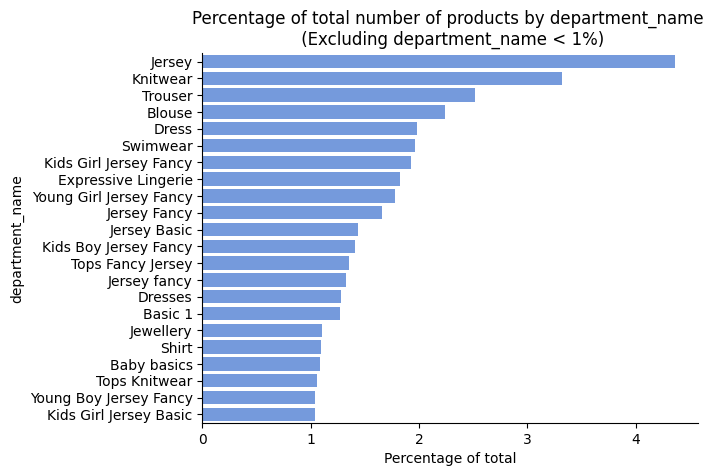

In [ ]:
column = 'department_name'
j = articles[column].value_counts(normalize=True).reset_index()
j.columns = [column, 'proportion']
j['perc'] = j['proportion']*100
j[j['proportion']>=0.01]

# Plotting dist by column name
sns.barplot(j[j['proportion']>=0.01], x='perc', y=column,
           color='cornflowerblue')
sns.despine()
plt.title(f'Percentage of total number of products by {column} \n (Excluding {column} < 1%)')
plt.xlabel('Percentage of total')
plt.ylabel(column)

plt.show();

We might want to drop both columns corresponding to department as the information stored is overlapping with other columns (i.e. product_group). We can discuss this in the EDA.

#### section_no and section_name

In [ ]:
# Finding product_type_no with more than one unique prod_type_name
(articles.groupby('section_no')['section_name'].nunique()>1).sum()

0

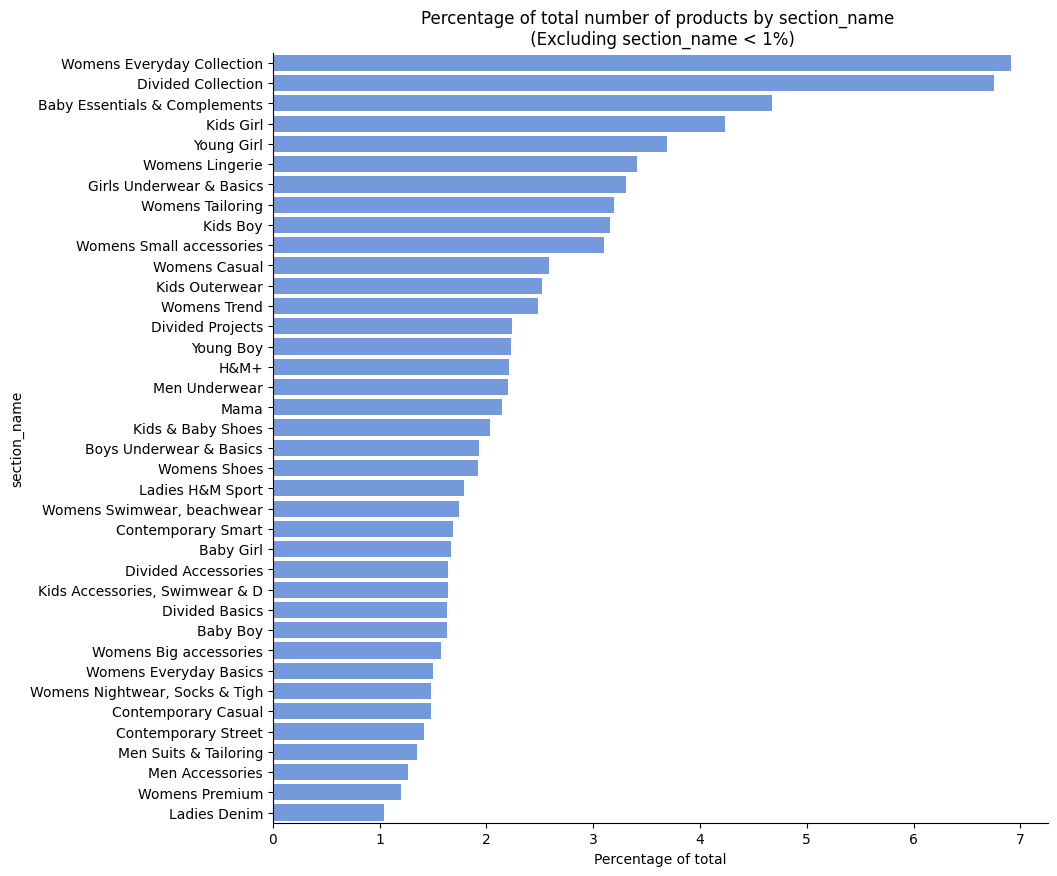

In [ ]:
column = 'section_name'
j = articles[column].value_counts(normalize=True).reset_index()
j.columns = [column, 'proportion']
j['perc'] = j['proportion']*100
j[j['proportion']>=0.01]

# Plotting dist by column name
plt.figure(figsize=(10,10))
sns.barplot(j[j['proportion']>=0.01], x='perc', y=column,
           color='cornflowerblue')
sns.despine()
plt.title(f'Percentage of total number of products by {column} \n (Excluding {column} < 1%)')
plt.xlabel('Percentage of total')
plt.ylabel(column)

plt.show();

We can drop section_no safely here as well, seems like section would be a column worth keeping by looking at the rather evenly distributed distribution.

---

### Dropping code columns

- After looking into the columns and some cleaning, we can now safely drop the "code/no." columns to remove duplicated informations among columns.
- We will keep the product_code here since we will be using it later, and there are duplicated prod_name for different product_code


In [ ]:
# Getting the code columns from the cnpairs_diff dataframe defined earlier
cols_to_drop = cnpairs_diff.iloc[1:,0].to_list()
print(cols_to_drop)
print(f'columns before dropping: {articles.shape[1]}')

# Dropping columns
articles.drop(cols_to_drop, axis=1, inplace=True)
print(f'columns after dropping: {articles.shape[1]}')

['product_type_no', 'graphical_appearance_no', 'colour_group_code', 'perceived_colour_value_id', 'perceived_colour_master_id', 'department_no', 'index_code', 'index_group_no', 'section_no', 'garment_group_no']
columns before dropping: 25
columns after dropping: 15


After dropping, we have 15 columns left in the articles table!

Let's save the cleaned article data

In [ ]:
# Save df to csv
articles.to_csv(path + 'data/articles_cleaned.csv', index=False)

---

## Customers

### Shape, missing values, and duplicates

Again, for the customer table, we look at the shape, NANs, and duplicated first.

In [ ]:
customers = pd.read_csv(path + 'data/customers.csv')

In [ ]:
customers.shape

(1371980, 7)

Over 1.3M of customers, and 7 columns. Much less information here than in the articles table. Let's see if there are useful ones, we can drop those that are not useful.

In [ ]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [ ]:
customers.isna().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

We can already see some NaNs here in FN and Active. [Here](https://www.kaggle.com/competitions/h-and-m-personalized-fashion-recommendations/discussion/305952#1684481), we found a comment left by the competition host explaining these two variables:
- **FN**: if a customer get Fashion News newsletter
- **Active**: if the customer is active for communication

In [ ]:
customers.duplicated().sum()

0

No duplicated rows.

---

### Imputing missing values

In [ ]:
customers['FN'].value_counts()

1.0    476930
Name: FN, dtype: int64

In [ ]:
customers['Active'].value_counts()

1.0    464404
Name: Active, dtype: int64

In [ ]:
customers['club_member_status'].value_counts()

ACTIVE        1272491
PRE-CREATE      92960
LEFT CLUB         467
Name: club_member_status, dtype: int64

- `FN` and `Active` are either 1 or NaN, we would replace the NaN with 0 here.
- `club_member_status` are either ACTIVE, PRE_CREATE, or LEFT CLUB, we can assign NONE to the NaN obs.

In [ ]:
# Impute NaNs for FN, Active, and club_member_status
customers['FN'] = -customers['FN'].isna()
customers['Active'] = -customers['Active'].isna()
customers['club_member_status'] = customers['club_member_status'].fillna('NONE')

In [ ]:
customers['fashion_news_frequency'].value_counts()

NONE         877711
Regularly    477416
Monthly         842
None              2
Name: fashion_news_frequency, dtype: int64

For the `fashion_news_frequency`, we would assign NaNs to the already exist **NONE** category.

In [ ]:
# Impute fashion_news_frequency
customers['fashion_news_frequency'] = customers['fashion_news_frequency'].fillna('NONE')

---

Next, age is a tricky one. Let's look at the distribution first.

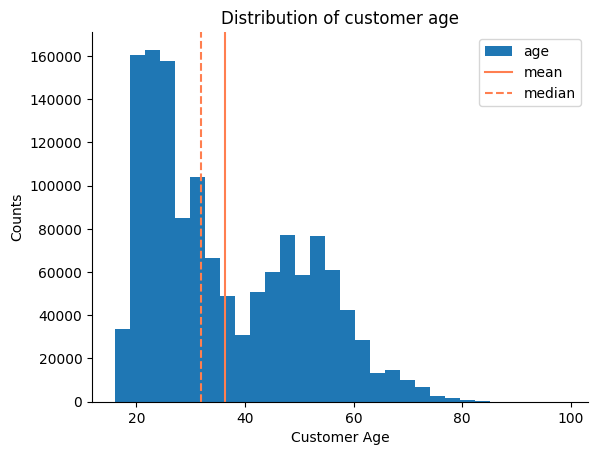

In [ ]:
customers['age'].plot(kind='hist', bins=30)
plt.axvline(customers['age'].mean(), 0, 2000, c='coral', label='mean')
plt.axvline(customers['age'].median(), 0, 2000, c='coral', label='median', linestyle='--')
sns.despine()
plt.title('Distribution of customer age')
plt.xlabel('Customer Age')
plt.ylabel('Counts')
plt.legend()
plt.show();

In [ ]:
print(customers['age'].isna().sum())
print(customers['age'].isna().mean()*100)

15861
1.1560664149623172


We have 15861 missing values for age, which is around 1.15% of the total observations. Imputing them with median age of all customers might not skew the distribution too much.

In [ ]:
# fill NaN for customer age with median
customers['age'] = customers['age'].fillna(customers['age'].median())

Sanity check the distribution:

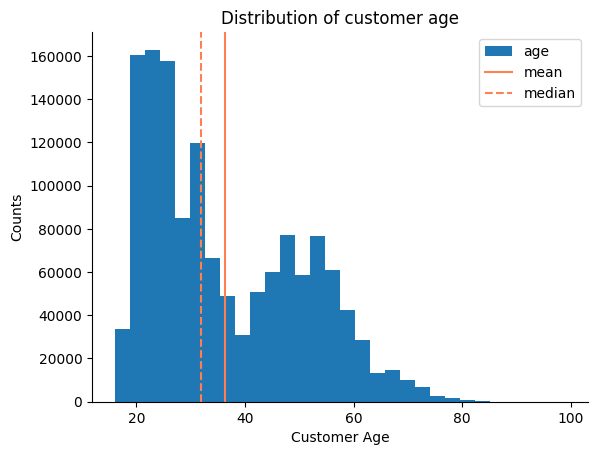

In [ ]:
customers['age'].plot(kind='hist', bins=30)
plt.axvline(customers['age'].mean(), 0, 2000, c='coral', label='mean')
plt.axvline(customers['age'].median(), 0, 2000, c='coral', label='median', linestyle='--')
sns.despine()
plt.title('Distribution of customer age')
plt.xlabel('Customer Age')
plt.ylabel('Counts')
plt.legend()
plt.show();

Finally, sanity check if we have dealt with all missing values:

In [ ]:
customers.isna().sum()

customer_id               0
FN                        0
Active                    0
club_member_status        0
fashion_news_frequency    0
age                       0
postal_code               0
dtype: int64

**Note**: postal_code seems to be tokenized. We assume it is from all around the globe, hence might be messy. However, it is our only information about customer location. I think we can keep it for now and try to see if any valuable information could be derived from it.

In [ ]:
customers['postal_code'].nunique()

352899

In [ ]:
(customers['postal_code'].value_counts()<=10).sum()

341957

We have 352k unique postal code. However, 341k of them have less than 10 observations. We might want to drop it before modeling, unless we can retrieve more information from the tokenized string.

In [ ]:
customers.to_csv(path + 'data/customers_cleaned.csv', index=False)

---

## Transactions

In [ ]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


It looks like we only have 5 columns in transactions:
- With **customer_id** we can merge the `customers` table.
- With **article_id** we can merge the `articles` table.
- **price** column here would be our only source if we want to approximate revenue for certain product category or time period (since we don't have price information in the `articles` table).  We don't have informations about the product *costs* as well.
- For **sales_channel_id**, we need to look further into what actual channel the id corresponds to.

### Shape, missing values, and duplicates

In [ ]:
transactions.shape

(31788324, 5)

We have 31.7M transactions in our data...Let's check if any of the rows have missing values.

In [ ]:
is_na = transactions.isna().sum()
print(is_na)

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64


Nice, looks clean.  
Checking for duplicated rows:

In [ ]:
dup = transactions.duplicated()
print(dup.sum())

2974905


In [ ]:
2974905/transactions.shape[0]

0.09358483322367042

It looks like there are quite some duplicated rows (almost 10%)... My assumptions is that since we don't have number of units in the transaction data, the duplicated rows might just be indicating the customer have purchased multiple units of the same items. Let's look into it.

In [ ]:
trans_dup = transactions[dup].to_pandas()
display(trans_dup.head(10))

,t_dat,customer_id,article_id,price,sales_channel_id
15,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,501820043,0.016932,2
18,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,671505001,0.033881,2
20,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,631848002,0.033881,2
21,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,631848002,0.033881,2
22,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,631848002,0.033881,2
25,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,676827002,0.042356,2
27,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,685687002,0.016932,2
29,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,680912006,0.016932,2
31,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,692454002,0.025407,2
33,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,640639001,0.010153,2


It does seems like duplicated rows are just multiple units being purchased. We can deal with this by adding a new column **units**, which counts the number of unique transactions of the same duplicates.

In [ ]:
# Transforming data by adding units, eliminating duplicated rows.
transactions['units']=0
transactions = transactions.groupby(['t_dat','customer_id', 'article_id', 'price', 'sales_channel_id'])['units'].count().reset_index()
display(transactions.head())

,t_dat,customer_id,article_id,price,sales_channel_id,units
0,2019-07-27,f213f4defbebf238821deba938cea68d1abae6d09268b3...,741814001,0.028797,1,1
1,2019-07-07,4de34dfcd347dac1f5161090b63aab0005e8f5316fe6b9...,725631004,0.015220,2,1
2,2019-11-11,2f3e9091c329f614553fab4d7a87a6c207e8b4c622963b...,815833002,0.030153,2,1
3,2019-04-08,6f4a47d74215cab0180256203c0747bf2471d362c98a82...,679662001,0.023712,2,1
4,2020-01-08,60961c09be5f303fe03d9503fb6398bf6336bed65066a4...,797529001,0.010153,2,1


Sanity Check...

In [ ]:
print(transactions.to_pandas().duplicated().sum())

0


In [ ]:
display(transactions[transactions['units']>1])

,t_dat,customer_id,article_id,price,sales_channel_id,units
5,2019-07-26,c673e332120e897ac520b918d5399844f06af60e5c25d1...,477507011,0.011847,2,2
10,2019-07-28,ee7ddcf12bcbbbb844e757d6e89b1acd614aa180da02eb...,772349003,0.006763,2,2
20,2018-09-29,20a4c479bc2acbc048257fc7a967e3b46294a2ef9ba093...,524061003,0.050831,2,2
30,2019-05-28,5a07c13a08d453c224f305b69118c3d751774ee293477b...,554772002,0.008458,2,2
42,2019-11-17,3f34fbf8e20a78655526a5072240ea2760a9bc78c66da4...,709332001,0.047441,2,2
...,...,...,...,...,...,...
28813349,2019-07-19,409f2d10710ac8b330b54aa04d90d3e62d25849720d781...,599580028,0.016475,2,3
28813351,2018-10-24,c36093b42787bd786322141a0da55087250f186d0d5be2...,554598001,0.016932,2,4
28813392,2018-09-28,013944b3e0f4c3ea9a94dab829ace5524bcb0b56a4b257...,583534002,0.016932,2,2
28813416,2020-06-23,b40951cfd1cb60c7df85df5faa2456792765c37009366d...,817358001,0.033881,2,2


In [ ]:
transactions.shape

(28813419, 6)

After transformation, we have around 28.8M actual transactions left, with around 2.5M of them having multiple units. Note that the price here becomes the unit_price, might want to specity that before going further.

In [ ]:
transactions = transactions.rename(columns={'price':'unit_price'})
transactions.head()

,t_dat,customer_id,article_id,unit_price,sales_channel_id,units
0,2019-07-27,f213f4defbebf238821deba938cea68d1abae6d09268b3...,741814001,0.028797,1,1
1,2019-07-07,4de34dfcd347dac1f5161090b63aab0005e8f5316fe6b9...,725631004,0.015220,2,1
2,2019-11-11,2f3e9091c329f614553fab4d7a87a6c207e8b4c622963b...,815833002,0.030153,2,1
3,2019-04-08,6f4a47d74215cab0180256203c0747bf2471d362c98a82...,679662001,0.023712,2,1
4,2020-01-08,60961c09be5f303fe03d9503fb6398bf6336bed65066a4...,797529001,0.010153,2,1


---

### Data types

Let's check if the data types are in correct format.

In [ ]:
transactions.info()

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 28813419 entries, 0 to 28813418
Data columns (total 6 columns):
 #   Column            Dtype
---  ------            -----
 0   t_dat             object
 1   customer_id       object
 2   article_id        int64
 3   unit_price        float64
 4   sales_channel_id  int64
 5   units             int64
dtypes: float64(1), int64(3), object(2)
memory usage: 3.1+ GB


Looks like we need to change **t_dat** to datetime format.

In [ ]:
# Change t_data foramt to date
transactions['t_dat'] = cudf.to_datetime(transactions['t_dat'])

Sanity check...

In [ ]:
transactions.info()

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 28813419 entries, 0 to 28813418
Data columns (total 6 columns):
 #   Column            Dtype
---  ------            -----
 0   t_dat             datetime64[ns]
 1   customer_id       object
 2   article_id        int64
 3   unit_price        float64
 4   sales_channel_id  int64
 5   units             int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 2.9+ GB


**sales_channel_id** needs some context added. We can actually find information [here](https://www.kaggle.com/competitions/h-and-m-personalized-fashion-recommendations/discussion/305952#1684481), which says "2 is online and 1 is store".
- 2: Online
- 1: Store

In [ ]:
transactions['sales_channel_id'].value_counts()

2    19686806
1     9126613
Name: sales_channel_id, dtype: int64

It seems like a lot more transactions are made online... Let's add this context to our data:

In [ ]:
# Change from (2,1) to (Online, Store)
# Since we are using cudf instead of pandas, we can't use np.where
# transactions['is_online'] = np.where(transactions['sales_channel_id']==1, 0, 1)
transactions['is_online'] = transactions['sales_channel_id'].where(transactions['sales_channel_id'] == 1, 0).astype('int')
transactions['is_online'].value_counts()

0    19686806
1     9126613
Name: is_online, dtype: int64

In [ ]:
# Dropping the sales_channel_id
transactions = transactions.drop('sales_channel_id', axis=1)
transactions.head()

,t_dat,customer_id,article_id,unit_price,units,is_online
0,2019-07-27,f213f4defbebf238821deba938cea68d1abae6d09268b3...,741814001,0.028797,1,1
1,2019-07-07,4de34dfcd347dac1f5161090b63aab0005e8f5316fe6b9...,725631004,0.015220,1,0
2,2019-11-11,2f3e9091c329f614553fab4d7a87a6c207e8b4c622963b...,815833002,0.030153,1,0
3,2019-04-08,6f4a47d74215cab0180256203c0747bf2471d362c98a82...,679662001,0.023712,1,0
4,2020-01-08,60961c09be5f303fe03d9503fb6398bf6336bed65066a4...,797529001,0.010153,1,0


In [ ]:
# save the processed data
transactions.to_pandas().to_csv(path + 'data/transactions_cleaned.csv', index=False)

Looks like we are ready to merge the data..

---

## Merging the dataset

Let's read in the cleaned datasets.

In [5]:
articles = pd.read_csv(path + 'data/articles_cleaned.csv')
customers = pd.read_csv(path + 'data/customers_cleaned.csv')
transactions = cudf.read_csv(path + 'data/transactions_cleaned.csv')

Before merging, let's verify the following 2 things:
- What proportion of the unique customer_id in the customers table v.s. in the transactions table
- What proportion of the unique article_id in the artices table v.s. in the transactions table

In [6]:
# proportion of the unique customer_id in the customers table v.s. in the transactions table
transactions['customer_id'].nunique()/customers['customer_id'].nunique()

0.9929306549658158

In [7]:
# proportion of the unique article_id in the articles table v.s. in the transactions table
transactions['article_id'].nunique()/articles['article_id'].nunique()

0.9905724735176518

The proportion matches pretty well, no more than 1% of the ids not there for transactions. We can start merging the data

In [8]:
# Joining the data
transactions = transactions.to_pandas()
temp = transactions.merge(articles, how='left', on='article_id')
hm_sales = temp.merge(customers, how='left', on='customer_id')
hm_sales.columns

Index(['t_dat', 'customer_id', 'article_id', 'unit_price', 'units',
       'is_online', 'product_code', 'prod_name', 'product_type_name',
       'product_group_name', 'graphical_appearance_name', 'colour_group_name',
       'perceived_colour_value_name', 'perceived_colour_master_name',
       'department_name', 'index_name', 'index_group_name', 'section_name',
       'garment_group_name', 'detail_desc', 'FN', 'Active',
       'club_member_status', 'fashion_news_frequency', 'age', 'postal_code'],
      dtype='object')

In [9]:
hm_sales = hm_sales.rename(columns={'product_code':'product_id'})

In [10]:
hm_sales.head()

,t_dat,customer_id,article_id,unit_price,units,is_online,product_id,prod_name,product_type_name,product_group_name,...,index_group_name,section_name,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,2019-07-27,f213f4defbebf238821deba938cea68d1abae6d09268b3...,741814001,0.028797,1,1,741814,Bagira Soft Body,Underwear body,Underwear,...,Ladieswear,Womens Lingerie,"Under-, Nightwear","Soft body in lace and mesh with soft, mesh-lin...",False,False,ACTIVE,NONE,33.0,0ae0bebbbea9331e4fd43921469b61f139faace018a842...
1,2019-07-07,4de34dfcd347dac1f5161090b63aab0005e8f5316fe6b9...,725631004,0.015220,1,0,725631,Lyon Price Bandeau,Bikini top,Swimwear,...,Ladieswear,"Womens Swimwear, beachwear",Swimwear,"Strapless, fully lined bandeau bikini top with...",False,False,ACTIVE,NONE,23.0,bf2d6649f8c7bd6ccaa62672aa0729087e1f7fb1c0154b...
2,2019-11-11,2f3e9091c329f614553fab4d7a87a6c207e8b4c622963b...,815833002,0.030153,1,0,815833,Ike Skirt,Skirt,Garment Lower body,...,Divided,Divided Projects,Trousers,"Short imitation suede skirt with a high, elast...",True,True,ACTIVE,Regularly,23.0,f842375d1e9085112927a1c5cf2071a65e2c129dd2a8b5...
3,2019-04-08,6f4a47d74215cab0180256203c0747bf2471d362c98a82...,679662001,0.023712,1,0,679662,Peach Fluid Parka,Jacket,Garment Upper body,...,Divided,Divided Collection,Outdoor,"Parka in a woven modal blend with a soft, brus...",False,False,ACTIVE,NONE,40.0,03cf9d47169b58b2b7f7046de3de4264673451f2c5a77a...
4,2020-01-08,60961c09be5f303fe03d9503fb6398bf6336bed65066a4...,797529001,0.010153,1,0,797529,Ophelia Brazilian Anemon,Underwear bottom,Underwear,...,Ladieswear,Womens Lingerie,"Under-, Nightwear","Brazilian briefs in lace with a low waist, lin...",False,False,ACTIVE,NONE,35.0,b94e23d83a9fc35fd56a38a89c47398f02a7fdd0814dd8...


In [11]:
hm_sales.shape

(28813419, 26)

After merging, verify the following 2 things:
- Are there any customer_id recorded in the transaction table not in customers table?
- Are there any article_id recorded in the transaction table not in articles table?  

We can simply do this by checking for NaNs in any of the columns of customers and articles.

In [12]:
hm_sales['FN'].isna().sum()

0

In [13]:
hm_sales['product_type_name'].isna().sum()

0

No missing values! We can save the merged dataframe now!

In [14]:
hm_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28813419 entries, 0 to 28813418
Data columns (total 26 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   t_dat                         object 
 1   customer_id                   object 
 2   article_id                    int64  
 3   unit_price                    float64
 4   units                         int64  
 5   is_online                     int64  
 6   product_id                    int64  
 7   prod_name                     object 
 8   product_type_name             object 
 9   product_group_name            object 
 10  graphical_appearance_name     object 
 11  colour_group_name             object 
 12  perceived_colour_value_name   object 
 13  perceived_colour_master_name  object 
 14  department_name               object 
 15  index_name                    object 
 16  index_group_name              object 
 17  section_name                  object 
 18  garment_group_name  

Let's convert column `is_online` to boolean:

In [15]:
hm_sales['is_online'] = hm_sales['is_online'].astype('bool')

In [16]:
# Save the merged files. Blocked code in case running it by accident
# hm_sales.to_csv(path + 'data/hm_sales.csv', index=False)

# Preliminary EDA

Let's use our previously preprocessed and merged data for EDA.

In [17]:
hm_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28813419 entries, 0 to 28813418
Data columns (total 26 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   t_dat                         object 
 1   customer_id                   object 
 2   article_id                    int64  
 3   unit_price                    float64
 4   units                         int64  
 5   is_online                     bool   
 6   product_id                    int64  
 7   prod_name                     object 
 8   product_type_name             object 
 9   product_group_name            object 
 10  graphical_appearance_name     object 
 11  colour_group_name             object 
 12  perceived_colour_value_name   object 
 13  perceived_colour_master_name  object 
 14  department_name               object 
 15  index_name                    object 
 16  index_group_name              object 
 17  section_name                  object 
 18  garment_group_name  

We already grasp some information from the data cleaning phase... Now we can look further into the data.

## Numeric Columns

In [18]:
numeric_df = hm_sales.select_dtypes('number')
numeric_df.shape

(28813419, 5)

We only have 5 numerical columns, we can ignore the article_id and product_id as they should actually be categorical. For the other 3 columns, their distributions can be visualized as follows:

In [19]:
numeric_df = numeric_df.drop(['article_id','product_id'], axis=1)

In [20]:
numeric_df.columns

Index(['unit_price', 'units', 'age'], dtype='object')

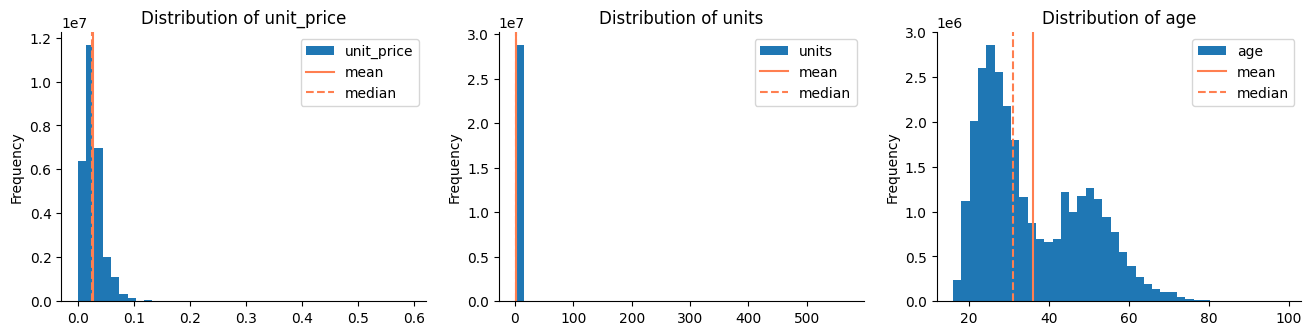

In [21]:
plt.subplots(1,3, figsize=(16,3.5))
for i, col in enumerate(numeric_df.columns):
    plt.subplot(1,3,i+1)
    numeric_df[col].plot(kind='hist', bins = 40)

    # plotting mean and median lines
    plt.axvline(numeric_df[col].mean(), 0, 2000, c='coral', label='mean')
    plt.axvline(numeric_df[col].median(), 0, 2000, c='coral', linestyle='--', label='median')

    sns.despine()
    plt.title(f'Distribution of {col}')
    plt.legend()
plt.show();

- Unit price seems to be slightly skewed to the right. The price seems to be scaled already.
- The majority of the units in each transactions is 1. Transactions are only aggregated with the number of units of each article. It cannot tell if a customer bought multiple different items in one order. We can retrieve this information by grouping t_dat and customer_id. The assumption here is a customer would only make one order maximum each day.
- Two age range can be identified with the most number of transactions: 23-33 and 45-55.

In [22]:
numeric_df['unit_price'].mean()

0.027728679892200483

We have our average unit_price at 0.027 this column has probably been transformed and thus not reflecting the real price.

In [23]:
numeric_df['units'].value_counts()

1      26269511
2       2285073
3        177237
4         55412
5          9259
         ...   
89            1
114           1
63            1
64            1
62            1
Name: units, Length: 75, dtype: int64

Here, we can see that most of our transactions have only less than 5 unit of product being purchased.

Let's look at the correlation of the numeric columns

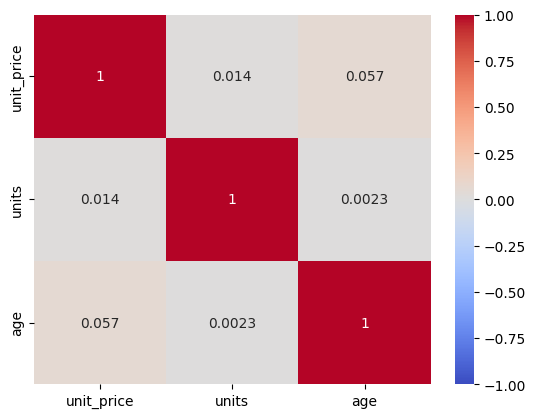

In [24]:
sns.heatmap(numeric_df.corr(),annot=True, cmap='coolwarm', vmin=-1, vmax=1);

The correlation between numeric variables are pretty close to 0.

## N_transactions by product category

In [25]:
hm_sales.columns[7:18]

Index(['prod_name', 'product_type_name', 'product_group_name',
       'graphical_appearance_name', 'colour_group_name',
       'perceived_colour_value_name', 'perceived_colour_master_name',
       'department_name', 'index_name', 'index_group_name', 'section_name'],
      dtype='object')

We have 11 product related variables that can be used as segments.

In [26]:
hm_sales.iloc[:,7:18].nunique()

prod_name                       43145
product_type_name                 130
product_group_name                 19
graphical_appearance_name          30
colour_group_name                  50
perceived_colour_value_name         8
perceived_colour_master_name       20
department_name                   250
index_name                         10
index_group_name                    5
section_name                       56
dtype: int64

As calculated above, these are the unique values for each product category related variables. For example, we have 56 different sections in this dataframe.

For preliminary EDA we would like to look at a higher level category. In this case, We might want to look at product_group_name, index_name, or index_group_name.

Let's look into how classes are distributed among the three columns.

In [27]:
prod_seg = hm_sales[['product_group_name','index_name', 'index_group_name']]

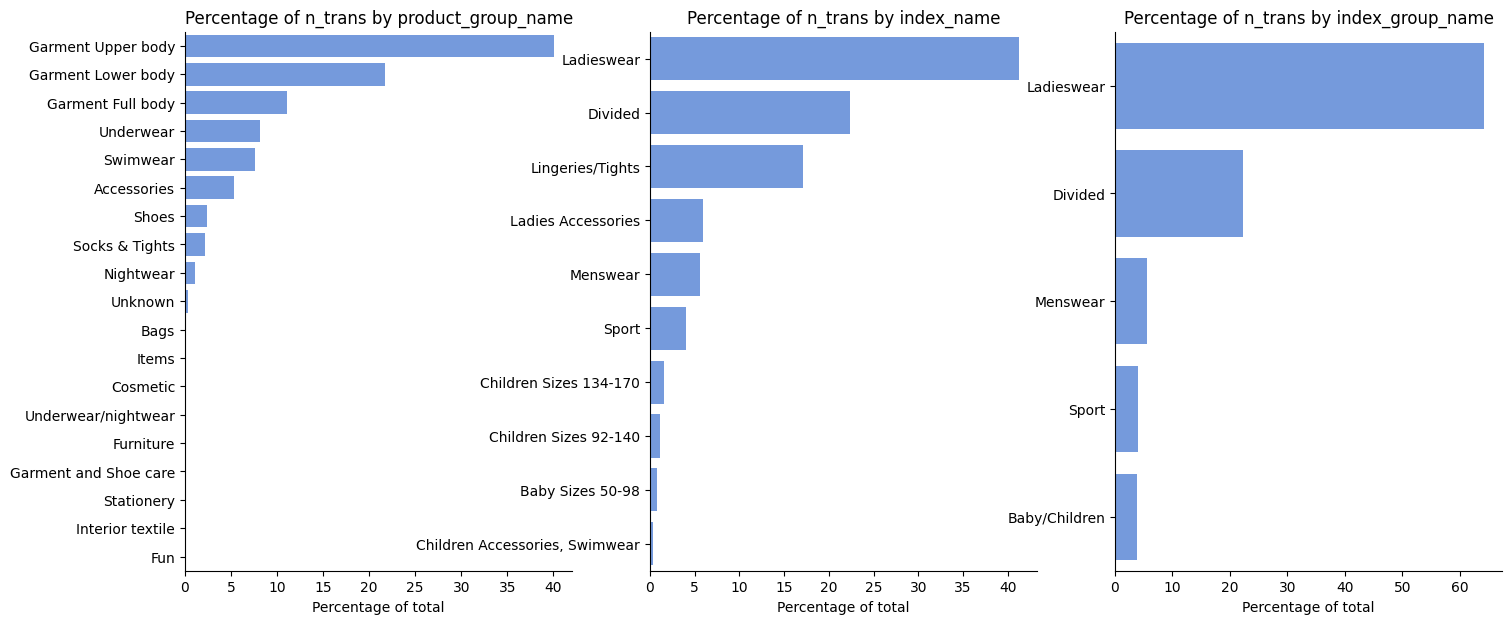

In [28]:
plt.subplots(1,3, figsize=(17,7))
for i, col in enumerate(prod_seg.columns):
    plt.subplot(1,3,i+1)
    j = prod_seg[col].value_counts(normalize=True).to_frame().reset_index()
    j.columns = [col, 'proportion']
    j['perc'] = j['proportion']*100

    # Plotting dist by segments
    sns.barplot(j, x='perc', y=col, color='cornflowerblue')
    sns.despine()
    plt.title(f'Percentage of n_trans by {col}')
    plt.xlabel('Percentage of total')
    plt.ylabel(None)

plt.show();

- Hierarchies can be seen from categorical variables that is related to products, might need feature engineering.
- Over 60% of the transactions are **Ladieswaer** according to index_group_name.


In [29]:
prod_seg.groupby(['index_group_name', 'index_name']).count().sort_values(['index_group_name','product_group_name'], ascending=False)

product_group_name
index_group_name index_name                                        
Sport            Sport                                      1148763
Menswear         Menswear                                   1608839
Ladieswear       Ladieswear                                11882578
                 Lingeries/Tights                           4920372
                 Ladies Accessories                         1692785
Divided          Divided                                    6440803
Baby/Children    Children Sizes 134-170                      461455
                 Children Sizes 92-140                       319675
                 Baby Sizes 50-98                            239709
                 Children Accessories, Swimwear               98440

- **Ladieswear** and **Baby/Children** have subcategories.

## Time Series

To conduct time series EDA it would be easier if we set date as index first.

In [30]:
hm_sales['t_dat'] = pd.to_datetime(hm_sales['t_dat'])
hm_sales = hm_sales.set_index('t_dat')
hm_sales.head()

,customer_id,article_id,unit_price,units,is_online,product_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,...,index_group_name,section_name,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
t_dat,,,,,,,,,,,,,,,,,,,,,
2019-07-27,f213f4defbebf238821deba938cea68d1abae6d09268b3...,741814001,0.028797,1,True,741814,Bagira Soft Body,Underwear body,Underwear,Solid,...,Ladieswear,Womens Lingerie,"Under-, Nightwear","Soft body in lace and mesh with soft, mesh-lin...",False,False,ACTIVE,NONE,33.0,0ae0bebbbea9331e4fd43921469b61f139faace018a842...
2019-07-07,4de34dfcd347dac1f5161090b63aab0005e8f5316fe6b9...,725631004,0.015220,1,False,725631,Lyon Price Bandeau,Bikini top,Swimwear,Solid,...,Ladieswear,"Womens Swimwear, beachwear",Swimwear,"Strapless, fully lined bandeau bikini top with...",False,False,ACTIVE,NONE,23.0,bf2d6649f8c7bd6ccaa62672aa0729087e1f7fb1c0154b...
2019-11-11,2f3e9091c329f614553fab4d7a87a6c207e8b4c622963b...,815833002,0.030153,1,False,815833,Ike Skirt,Skirt,Garment Lower body,Solid,...,Divided,Divided Projects,Trousers,"Short imitation suede skirt with a high, elast...",True,True,ACTIVE,Regularly,23.0,f842375d1e9085112927a1c5cf2071a65e2c129dd2a8b5...
2019-04-08,6f4a47d74215cab0180256203c0747bf2471d362c98a82...,679662001,0.023712,1,False,679662,Peach Fluid Parka,Jacket,Garment Upper body,Solid,...,Divided,Divided Collection,Outdoor,"Parka in a woven modal blend with a soft, brus...",False,False,ACTIVE,NONE,40.0,03cf9d47169b58b2b7f7046de3de4264673451f2c5a77a...
2020-01-08,60961c09be5f303fe03d9503fb6398bf6336bed65066a4...,797529001,0.010153,1,False,797529,Ophelia Brazilian Anemon,Underwear bottom,Underwear,Solid,...,Ladieswear,Womens Lingerie,"Under-, Nightwear","Brazilian briefs in lace with a low waist, lin...",False,False,ACTIVE,NONE,35.0,b94e23d83a9fc35fd56a38a89c47398f02a7fdd0814dd8...


In [31]:
hm_sales_monthly = hm_sales[['customer_id', 'units']].resample('MS').count()
hm_sales_monthly.head()

,customer_id,units
t_dat,,
2018-09-01,542680,542680
2018-10-01,1271899,1271899
2018-11-01,1158527,1158527
2018-12-01,1046956,1046956
2019-01-01,1127415,1127415


In [32]:
fig = px.line(hm_sales_monthly, x=hm_sales_monthly.index, y="units",)
fig.update_layout(
    yaxis_title="Number of transactions",
    xaxis_title="Year",
    legend_title="",
    title="Monthly transaction number from 2018 - 2019"
)
fig.show();

We can spot a seasonal trend here, with number of transactions peaked at June each year.

In [33]:
hm_sales = hm_sales.reset_index()
hm_sales.head()

,t_dat,customer_id,article_id,unit_price,units,is_online,product_id,prod_name,product_type_name,product_group_name,...,index_group_name,section_name,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,2019-07-27,f213f4defbebf238821deba938cea68d1abae6d09268b3...,741814001,0.028797,1,True,741814,Bagira Soft Body,Underwear body,Underwear,...,Ladieswear,Womens Lingerie,"Under-, Nightwear","Soft body in lace and mesh with soft, mesh-lin...",False,False,ACTIVE,NONE,33.0,0ae0bebbbea9331e4fd43921469b61f139faace018a842...
1,2019-07-07,4de34dfcd347dac1f5161090b63aab0005e8f5316fe6b9...,725631004,0.015220,1,False,725631,Lyon Price Bandeau,Bikini top,Swimwear,...,Ladieswear,"Womens Swimwear, beachwear",Swimwear,"Strapless, fully lined bandeau bikini top with...",False,False,ACTIVE,NONE,23.0,bf2d6649f8c7bd6ccaa62672aa0729087e1f7fb1c0154b...
2,2019-11-11,2f3e9091c329f614553fab4d7a87a6c207e8b4c622963b...,815833002,0.030153,1,False,815833,Ike Skirt,Skirt,Garment Lower body,...,Divided,Divided Projects,Trousers,"Short imitation suede skirt with a high, elast...",True,True,ACTIVE,Regularly,23.0,f842375d1e9085112927a1c5cf2071a65e2c129dd2a8b5...
3,2019-04-08,6f4a47d74215cab0180256203c0747bf2471d362c98a82...,679662001,0.023712,1,False,679662,Peach Fluid Parka,Jacket,Garment Upper body,...,Divided,Divided Collection,Outdoor,"Parka in a woven modal blend with a soft, brus...",False,False,ACTIVE,NONE,40.0,03cf9d47169b58b2b7f7046de3de4264673451f2c5a77a...
4,2020-01-08,60961c09be5f303fe03d9503fb6398bf6336bed65066a4...,797529001,0.010153,1,False,797529,Ophelia Brazilian Anemon,Underwear bottom,Underwear,...,Ladieswear,Womens Lingerie,"Under-, Nightwear","Brazilian briefs in lace with a low waist, lin...",False,False,ACTIVE,NONE,35.0,b94e23d83a9fc35fd56a38a89c47398f02a7fdd0814dd8...


**Summary**

Here we breifly sum up the preliminary EDA with some future works:
- Feature Engineering
    - As we are predicting trending of an item for the project, we need to come up with a rule to engineer the target feature "trending"
- More EDA
    - We haven't thoroughly look into all the categorical variables, maybe we can determine some key variables and drop those that are redundant after we figure out the hierarchies.
    - We may want to look into individual product groups and see if there are differences in customer demographics.

The goal for the next step EDA is to determine which attributes effects sales (n_transactions) the most.

# EDA - Product Analysis and Preprocessing

In ths part, we will look more in-depth into the product category columns. Some of the columns seems to be hierarchy of others. For example, we already know index_group_name is a supergroup of index_name. We'll be looking into those and determine which columns to keep/drop for the modelling part.

## Product Categories

In [34]:
hm_sales.columns[7:19]

Index(['prod_name', 'product_type_name', 'product_group_name',
       'graphical_appearance_name', 'colour_group_name',
       'perceived_colour_value_name', 'perceived_colour_master_name',
       'department_name', 'index_name', 'index_group_name', 'section_name',
       'garment_group_name'],
      dtype='object')

We've listed out all the columns related to product categories that we want to investigate here. Let's have a general overvie by looking at top 20 selling categories within each features.

In [18]:
pc_cols = ['product_type_name','product_group_name', 'department_name', 'index_name', 'index_group_name', 'section_name', 'garment_group_name', 'prod_name']
for col in pc_cols:
    print(col)

product_type_name
product_group_name
department_name
index_name
index_group_name
section_name
garment_group_name
prod_name


We can visualize how many unique values are in each columns:

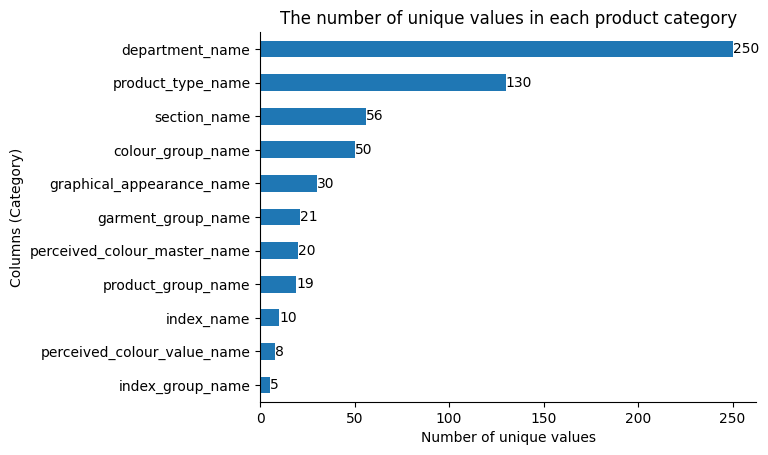

In [36]:
hm_sales.iloc[:,8:19].nunique().sort_values().plot(kind='barh')
plt.title('The number of unique values in each product category')
plt.xlabel('Number of unique values')
plt.ylabel('Columns (Category)')
sns.despine()
# Annotate each bar with the number of unique values
for index, value in enumerate(hm_sales.iloc[:, 8:19].nunique().sort_values()):
    plt.text(value, index, str(value), ha='left', va='center')
plt.show();

As we can see, the number of unique values range from 5 (unique index group) to 250 (unique departments). Now we can look at the top 20 of each.

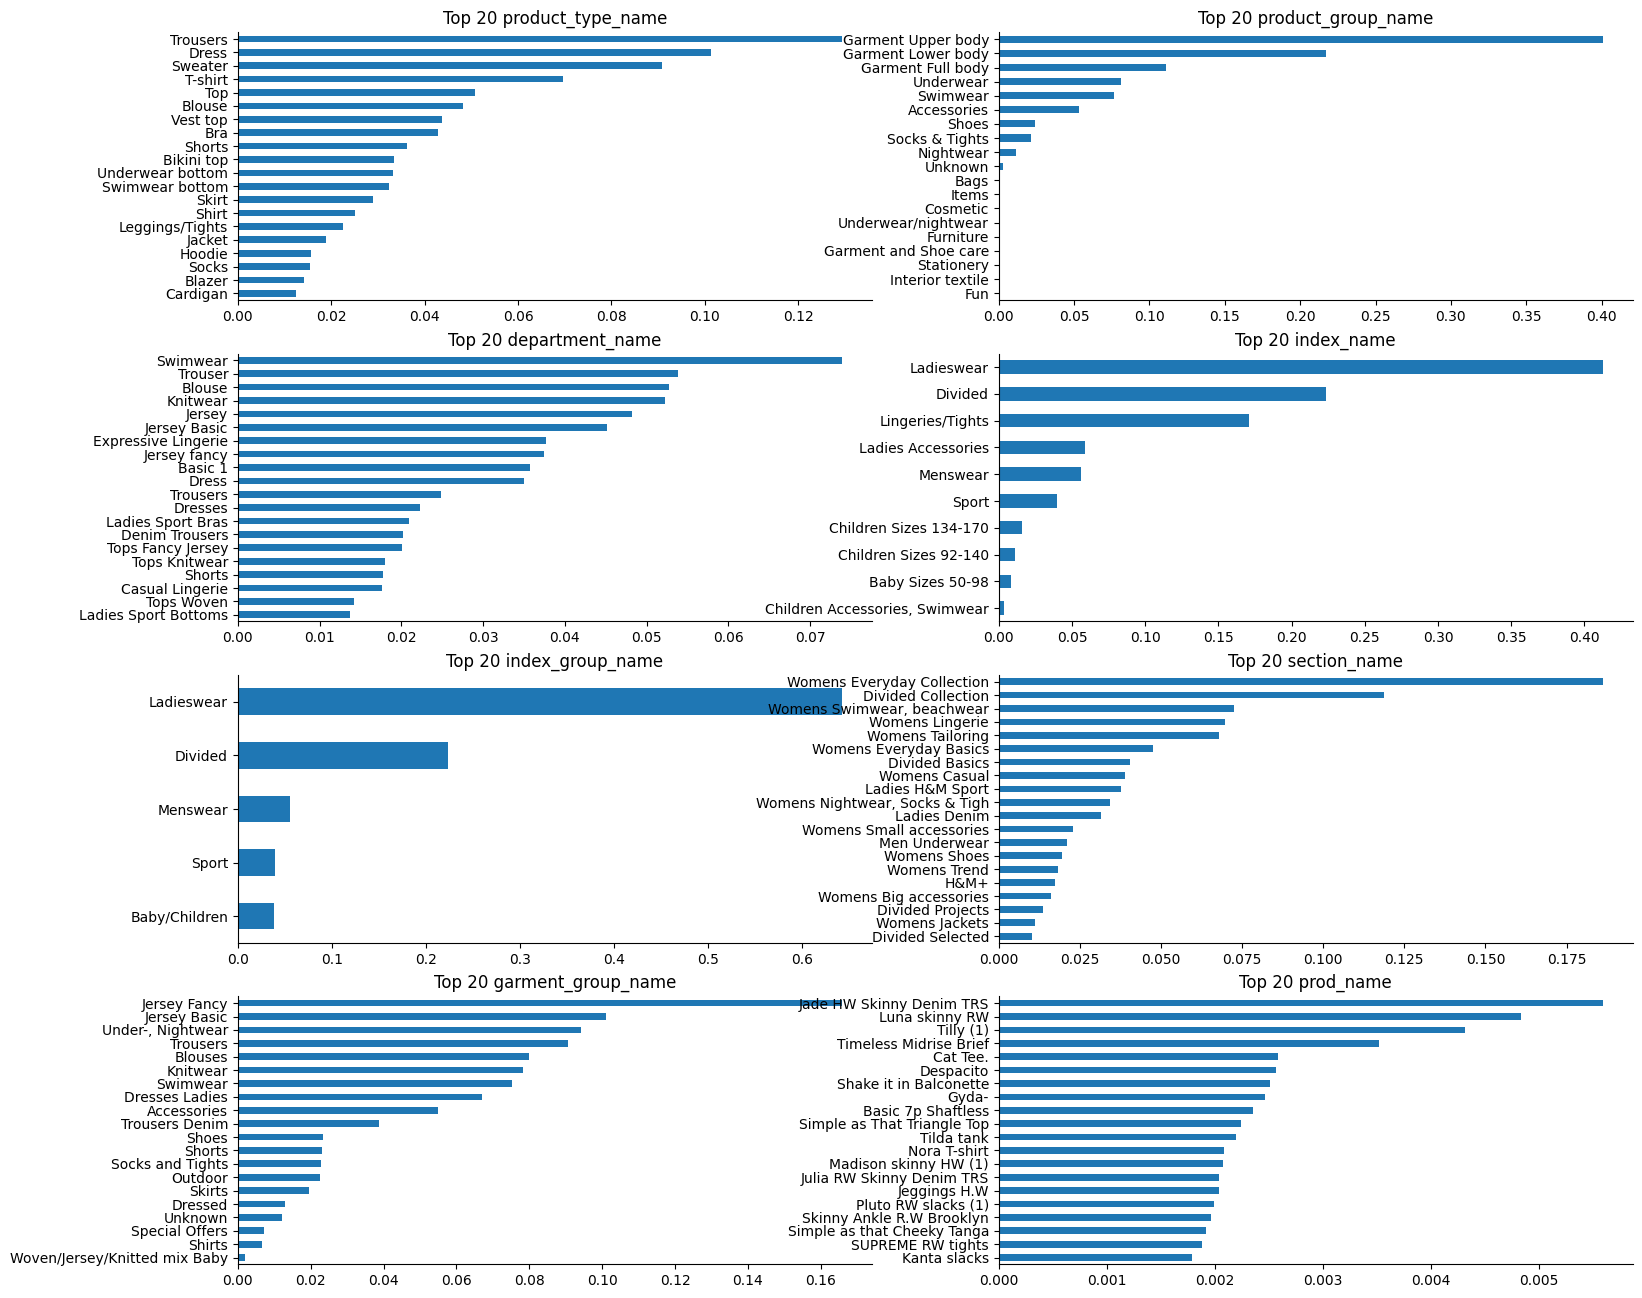

In [20]:
n = 20
# Visualize appearance columns sort by n_transactions
plt.subplots(4, 2, figsize=(18,16))
for i, col in enumerate(pc_cols):
    plt.subplot(4, 2, i+1)
    hm_sales[col].value_counts(normalize=True).head(n).plot(kind='barh')
    plt.gca().invert_yaxis()
    plt.title(f'Top {n} {col}')
    # plt.xlabel('Percentage of Total')
    sns.despine()
plt.show();

Except for prod_name we have 7 columns that is related with product categories:

- We already know that index and index group is a hierarchy and correponds to a larger group aiming at different demographics of the user.
- We can also see that product_type and product_group is another hierarchy, and might be the major columns we will be focusing on for this project.
- Section seems to be corresponds to different collection (design segments) that H&M as on offer.
- Department and garment_group seems to be more messy and unorganized with types overlapping with other columns. There might be some cleaning to do with that but for the scope of this project we might just drop them.

Now we can start looking at the hierarchies:
- index_group_name v.s. index_name
- product_group_name v.s. product_type_name

### Hierarchy 1 - index

**index_group_name v.s. index_name**

As we've already seen in the previous EDA, we know that `index_group_name` has a subset called `index_name`

In [21]:
hm_sales.groupby('index_group_name')['index_name'].unique().reset_index()

,index_group_name,index_name
0,Baby/Children,"[Baby Sizes 50-98, Children Sizes 92-140, Chil..."
1,Divided,[Divided]
2,Ladieswear,"[Lingeries/Tights, Ladieswear, Ladies Accessor..."
3,Menswear,[Menswear]
4,Sport,[Sport]


Here, `index_group_name` seems to be enough of the context we want. For simlicity we would want to drop `index_name`. Here we set a list for columns to be dropped and drop them at once later.

**Note** cols_to_drop is a place holder for the columns that we would like to drop. To make it more easy to replicate this work in the future, we would like to save all the work that involves changing the dataset at the later [Preprocessing Steps](#preprocessing-steps) section.

In [22]:
# Preprocess parameters - place holder for columns to be dropped
cols_to_drop = ['index_name']
cols_to_drop

['index_name']

### Hierarchy 2 - Group and Type

 **Product_group_name v.s. product_type_name**

Here we basically look at the two category and their relation ship with product name. We would like to know:
- How many products are within each product group?
- Is product_type_name a subset of product_group_name?
- Should we limit to only a few of the product groups for the scope of this project?

**How many products are within each product group**

In [23]:
product_group_count = hm_sales.groupby('product_group_name')['prod_name'].nunique().sort_values(ascending=False).reset_index().rename(columns={'prod_name':'n_unique_product'})
product_group_count['perc'] = product_group_count['n_unique_product']/hm_sales['prod_name'].nunique()
product_group_count

,product_group_name,n_unique_product,perc
0,Garment Upper body,15904,0.368617
1,Garment Lower body,7853,0.182014
2,Garment Full body,6531,0.151373
3,Accessories,5986,0.138741
4,Shoes,2522,0.058454
5,Underwear,1955,0.045312
6,Swimwear,1324,0.030687
7,Nightwear,636,0.014741
8,Socks & Tights,634,0.014695
9,Unknown,61,0.001414


- Here we can see that a lot of product groups contains less than 1% of the total products. We would consider dropping them.

In [24]:
# shape before dropping the rows
hm_sales.shape

(28813419, 26)

In [25]:
# dropping the rows in groups with less than 1% product
product_group_list = product_group_count[product_group_count['perc'] > 0.01]['product_group_name'].to_list()

# shape after dropping the rows
hm_sales[hm_sales['product_group_name'].isin(product_group_list)].shape

(28712292, 26)

**Is product_type_name a subset of product_group_name**

In [26]:
hm_sales.groupby(['product_group_name', 'product_type_name'])['prod_name'].nunique().reset_index().head(10)

,product_group_name,product_type_name,prod_name
0,Accessories,Accessories set,3
1,Accessories,Alice band,6
2,Accessories,Baby Bib,1
3,Accessories,Bag,756
4,Accessories,Beanie,28
5,Accessories,Belt,279
6,Accessories,Bracelet,139
7,Accessories,Braces,2
8,Accessories,Bucket hat,7
9,Accessories,Cap,8


We can see that product_group_name is a superset of product_type_name. We will keep them both for now. Just a note that we might need further NLP with product type name.

Finally, as we have so many product in our data. We might want to limit the scope of this project to look at only a few groups from product group.

**Limit the scope of the project to a few product groups**

Let's look at categories within the product group 'Garment Upper body'

In [27]:
# Filter group Garment Upper body and print unique values of category columns
for col in pc_cols:
    print(f'-------- {col} ----------')
    print(hm_sales[hm_sales['product_group_name']=='Garment Upper body'][col].unique())

-------- product_type_name ----------
['Jacket' 'Top' 'T-shirt' 'Blazer' 'Blouse' 'Hoodie' 'Sweater' 'Vest top'
 'Cardigan' 'Shirt' 'Polo shirt' 'Coat' 'Bodysuit' 'Outdoor Waistcoat'
 'Tailored Waistcoat']
-------- product_group_name ----------
['Garment Upper body']
-------- department_name ----------
['Outdoor/Blazers' 'Jersey fancy' 'Projects Jersey & Knitwear' 'Divided+'
 'Suit' 'Blouse' 'Suit jacket' 'Jersey Fancy' 'Knitwear' 'Jersey'
 'Basic 1' 'Jersey Basic' 'Outdoor/Blazers DS' 'Tops Fancy Jersey'
 'Campaigns' 'Light Basic Jersey' 'Woven Tops' 'Ladies Sport Bras'
 'Heavy Basic Jersey' 'Kids Boy Jersey Basic' 'Tops Woven' 'Loungewear'
 'Tops Knitwear' 'Kids Boy Jersey Fancy' 'AK Dresses & Outdoor' 'Shirt'
 'Young Girl Knitwear' 'Outwear' 'Woven top' 'Jersey Fancy DS'
 'Everyday Waredrobe Denim' 'Blouse & Dress' 'Baby Boy Outdoor'
 'Men Sport Bottoms' 'Young Boy Shirt' 'Denim Other Garments'
 'Young Girl Outdoor' 'Kids Girl Knitwear' 'Ladies Sport Woven'
 'Young Boy Outdoor' 'Bab

We might want to drop department name as there seems to be too many false information stored with context irrelavant to the product category. Let's give it a check:

In [30]:
hm_sales[hm_sales['product_group_name']=='Garment Upper body'].groupby(['product_type_name','department_name'])['prod_name'].nunique().reset_index().head(10)

,product_type_name,department_name,prod_name
0,Blazer,AK Dresses & Outdoor,5
1,Blazer,Asia Assortment,1
2,Blazer,Baby Boy Woven,1
3,Blazer,Blazer,90
4,Blazer,Blazer S&T,44
5,Blazer,Blouse & Dress,3
6,Blazer,Boys Local Relevance,3
7,Blazer,Campaigns,3
8,Blazer,Conscious Exclusive,4
9,Blazer,Denim wardrobe H&M man inactive from S.6,14


In [31]:
hm_sales[hm_sales['department_name']=='Asia Assortment'].groupby(['product_type_name'])['prod_name'].nunique().reset_index().head(10)

,product_type_name,prod_name
0,Blazer,1
1,Blouse,3
2,Cardigan,1
3,Coat,1
4,Dress,12
5,Hoodie,3
6,Jacket,5
7,Shirt,1
8,Skirt,5
9,Sweater,16


Also we check the same thing with garment_group_name.

In [32]:
hm_sales[hm_sales['product_group_name']=='Garment Upper body'].groupby(['product_type_name','garment_group_name'])['prod_name'].nunique().reset_index().head(10)

,product_type_name,garment_group_name,prod_name
0,Blazer,Blouses,4
1,Blazer,Dressed,373
2,Blazer,Dresses Ladies,13
3,Blazer,Jersey Fancy,4
4,Blazer,Outdoor,80
5,Blazer,Shirts,38
6,Blazer,Special Offers,12
7,Blazer,Trousers,3
8,Blazer,Unknown,48
9,Blazer,Woven/Jersey/Knitted mix Baby,1


For the simlicity of this project, I will make a call here to drop these two columns.

In [33]:
# Update Preprocess parameters
cols_to_drop.append('department_name')
cols_to_drop.append('garment_group_name')
cols_to_drop

['index_name', 'department_name', 'garment_group_name']

As for the product groups to keep within the scope of this project, we refer to the sales with top 5 sales. As we are selecting only the product group with top 5 sales, we no longer need to remove the groups with less than 1% of total products.

In [34]:
# Preprocess parameters
groups_to_keep = hm_sales['product_group_name'].value_counts().head(5).index.to_list()
groups_to_keep

['Garment Upper body',
 'Garment Lower body',
 'Garment Full body',
 'Underwear',
 'Swimwear']

## Appearance - colours and graphical appearances

Let's look at some colors!

In [35]:
hm_sales['colour_group_name'].unique()

array(['Black', 'Orange', 'Greenish Khaki', 'Dark Yellow', 'Light Grey',
       'Light Blue', 'Dark Blue', 'Light Beige', 'White', 'Grey',
       'Yellow', 'Off White', 'Dark Orange', 'Dark Green', 'Gold',
       'Light Pink', 'Pink', 'Dark Grey', 'Light Yellow', 'Dark Red',
       'Red', 'Blue', 'Dark Beige', 'Yellowish Brown', 'Beige', 'Green',
       'Light Orange', 'Light Green', 'Dark Pink', 'Light Purple',
       'Other Purple', 'Turquoise', 'Other Pink', 'Purple',
       'Greyish Beige', 'Dark Purple', 'Light Turquoise', 'Light Red',
       'Silver', 'Other Red', 'Dark Turquoise', 'Transparent',
       'Other Green', 'Other Yellow', 'Other Blue', 'Bronze/Copper',
       'Other', 'Other Orange', 'Other Turquoise', 'Unknown'],
      dtype=object)

In [36]:
hm_sales['graphical_appearance_name'].unique()

array(['Solid', 'Embroidery', 'Stripe', 'All over pattern',
       'Other structure', 'Check', 'Denim', 'Placement print',
       'Other pattern', 'Lace', 'Contrast', 'Melange', 'Treatment',
       'Mixed solid/pattern', 'Colour blocking', 'Application/3D',
       'Glittering/Metallic', 'Chambray', 'Front print', 'Sequin',
       'Jacquard', 'Dot', 'Neps', 'Slub', 'Metallic', 'Mesh',
       'Transparent', 'Unknown', 'Argyle', 'Hologram'], dtype=object)

In [37]:
hm_sales['perceived_colour_value_name'].unique()

array(['Dark', 'Bright', 'Medium Dusty', 'Dusty Light', 'Light', 'Medium',
       'Undefined', 'Unknown'], dtype=object)

In [38]:
hm_sales['perceived_colour_master_name'].unique()

array(['Black', 'Orange', 'Khaki green', 'Yellow', 'Grey', 'Blue',
       'Beige', 'White', 'Green', 'Metal', 'Pink', 'Red', 'Brown',
       'Lilac Purple', 'Mole', 'Unknown', 'Turquoise', 'undefined',
       'Yellowish Green', 'Bluish Green'], dtype=object)

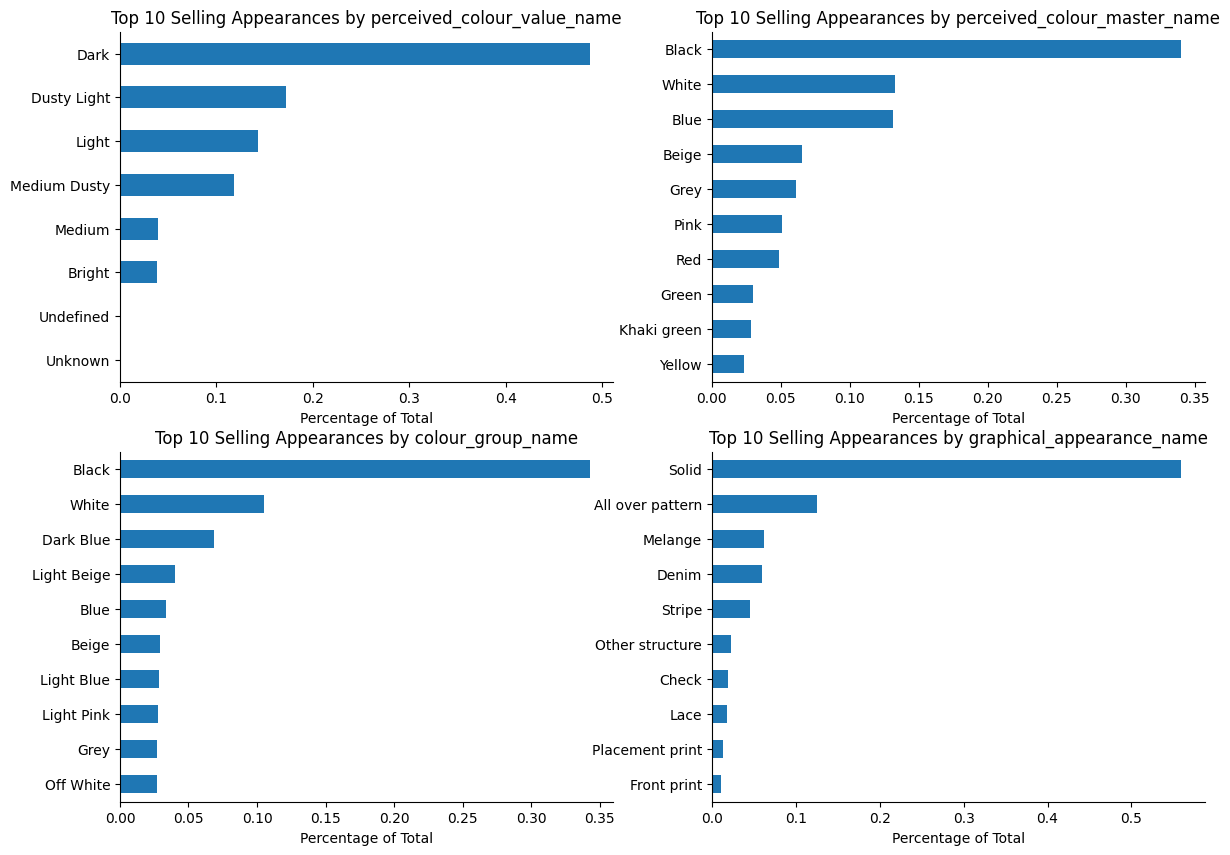

In [39]:
# select columns that are related to products appearance
appearance_cols = ['perceived_colour_value_name', 'perceived_colour_master_name', 'colour_group_name', 'graphical_appearance_name']

# Visualize appearance columns sort by n_transactions
plt.subplots(2, 2, figsize=(14,10))
for i, col in enumerate(appearance_cols):
    plt.subplot(2, 2, i+1)
    hm_sales[col].value_counts(normalize=True).head(10).plot(kind='barh')
    plt.gca().invert_yaxis()
    plt.title(f'Top 10 Selling Appearances by {col}')
    plt.xlabel('Percentage of Total')
    sns.despine()
plt.show();

**Notes**
- Black, white, blue, beige, and grey are the most selling colors, with black accumulating over 30% of total sales.
- Solid is a clear win in graphical appearance, with over 50% of total sales.
- We see that green, khak green, light blue, and light pink comes up in the top 10 as well, this might be an indicator of seasonal trend.
- Dark colours are more popular compared to lighter ones.

In [40]:
color_group = hm_sales.groupby(['perceived_colour_master_name', 'colour_group_name']).count().sort_values('perceived_colour_master_name')['customer_id'].reset_index()
color_group = color_group.rename(columns={'customer_id':'counts'})

In [41]:
color_group[color_group['perceived_colour_master_name']=='Khaki green']

,perceived_colour_master_name,colour_group_name,counts
60,Khaki green,Dark Beige,4166
61,Khaki green,Dark Green,68833
62,Khaki green,Dark Yellow,5981
63,Khaki green,Green,47285
64,Khaki green,Greenish Khaki,695761
65,Khaki green,Greyish Beige,3664


In [42]:
color_group[color_group['colour_group_name']=='White']

,perceived_colour_master_name,colour_group_name,counts
129,Unknown,White,93477
139,White,White,2942931


**Preprocess Notes**
- perceived_colour_master_name seems to be a superset for colour_group_name. We might want to keep the former one as it already conveys enough information.
- perceived_colour_value_name seems to have a large difference between light and dark. We might just want to transform it to column `is_dark` with boolean.

In [43]:
cols_to_drop.append('colour_group_name')
cols_to_drop

['index_name', 'department_name', 'garment_group_name', 'colour_group_name']

In [44]:
# create is_dark column
is_dark = np.where(hm_sales['perceived_colour_value_name']=='Dark', 1, 0)

# Sanity check
(is_dark==1).sum()/is_dark.shape[0]

0.4871882784892692

In [45]:
cols_to_drop.append('perceived_colour_value_name')
cols_to_drop

['index_name',
 'department_name',
 'garment_group_name',
 'colour_group_name',
 'perceived_colour_value_name']

## Preprocessing Steps <a name="preprocessing-steps"></a>

Here, we omit our data based on the previous EDA with the following steps:  
- [X]  drop cols_to_drop
- [X]  drop product group with less than 1% of products
- [X]  select only a few product groups
- [X]  Add column is_dark

In [37]:
cols_to_drop = ['index_name', 'department_name', 'garment_group_name', 'colour_group_name', 'perceived_colour_value_name']
groups_to_keep =['Garment Upper body', 'Garment Lower body', 'Garment Full body', 'Underwear', 'Swimwear']

In [38]:
# Drop columns
print(f'columns before dropping: {hm_sales.shape[1]}')
hm_sales_processed = hm_sales.drop(cols_to_drop, axis=1)
print(f'columns after dropping: {hm_sales_processed.shape[1]}')

columns before dropping: 26
columns after dropping: 21


In [40]:
# Adding column is_dark
is_dark = np.where(hm_sales['perceived_colour_value_name']=='Dark', 1, 0)
hm_sales_processed['is_dark'] = is_dark
hm_sales_processed.columns

Index(['t_dat', 'customer_id', 'article_id', 'unit_price', 'units',
       'is_online', 'product_id', 'prod_name', 'product_type_name',
       'product_group_name', 'graphical_appearance_name',
       'perceived_colour_master_name', 'index_group_name', 'section_name',
       'detail_desc', 'FN', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age', 'postal_code', 'is_dark'],
      dtype='object')

In [41]:
hm_sales_processed['is_dark'].value_counts(normalize=True)

0    0.512812
1    0.487188
Name: is_dark, dtype: float64

In [42]:
# Select only rows of interested product group
print(f'groups to keep :{groups_to_keep}')
print(f'rows before dropping: {hm_sales_processed.shape[0]}')
hm_sales_processed = hm_sales_processed[hm_sales_processed['product_group_name'].isin(groups_to_keep)]
print(f'rows after dropping: {hm_sales_processed.shape[0]}')

groups to keep :['Garment Upper body', 'Garment Lower body', 'Garment Full body', 'Underwear', 'Swimwear']
rows before dropping: 28813419
rows after dropping: 25547159


In [43]:
# number of product_types
hm_sales_processed['product_type_name'].nunique()

43

We've successfully reduced product type within our scope while not reducing a lot of transactions. Next, we will look into sales analysis by number of transactions.

In [45]:
%%time
# Save the processed files. Blocked code in case running it by accident
hm_sales_processed.to_csv(path + 'data/hm_sales_processed.csv', index=False)

CPU times: user 6min 32s, sys: 8.72 s, total: 6min 40s
Wall time: 7min 10s


In [ ]:
%%time
# Uncomment code if u start from here
# hm_sales_processed = pd.read_csv(path + 'data/hm_sales_processed.csv')

# EDA - Sales Analysis (Time Series)

Here we are going to pick some of the top selling items, normalling selling items, and some of the items that perform not that well on sellings. We are going to explore the sales trend by time and see if there are similarities and differences for different performing products. Steps are as follows:

- [X] Pick items (`prod_name`) to explore:
    - [X] Analyzing the top performing product
    - [X] Randomly select products from different tiers (let's say 3-5 products for each tiers)
- [X] Aggregate with WEEK cyclicity and visualize
- [X] Find insights

### Analyzing top performing products

Let's start by doint it with one product, we can choose the top selling product as our example:

In [46]:
hm_sales_processed.head()

,t_dat,customer_id,article_id,unit_price,units,is_online,product_id,prod_name,product_type_name,product_group_name,...,index_group_name,section_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,is_dark
0,2019-07-27,f213f4defbebf238821deba938cea68d1abae6d09268b3...,741814001,0.028797,1,True,741814,Bagira Soft Body,Underwear body,Underwear,...,Ladieswear,Womens Lingerie,"Soft body in lace and mesh with soft, mesh-lin...",False,False,ACTIVE,NONE,33.0,0ae0bebbbea9331e4fd43921469b61f139faace018a842...,1
1,2019-07-07,4de34dfcd347dac1f5161090b63aab0005e8f5316fe6b9...,725631004,0.015220,1,False,725631,Lyon Price Bandeau,Bikini top,Swimwear,...,Ladieswear,"Womens Swimwear, beachwear","Strapless, fully lined bandeau bikini top with...",False,False,ACTIVE,NONE,23.0,bf2d6649f8c7bd6ccaa62672aa0729087e1f7fb1c0154b...,0
2,2019-11-11,2f3e9091c329f614553fab4d7a87a6c207e8b4c622963b...,815833002,0.030153,1,False,815833,Ike Skirt,Skirt,Garment Lower body,...,Divided,Divided Projects,"Short imitation suede skirt with a high, elast...",True,True,ACTIVE,Regularly,23.0,f842375d1e9085112927a1c5cf2071a65e2c129dd2a8b5...,1
3,2019-04-08,6f4a47d74215cab0180256203c0747bf2471d362c98a82...,679662001,0.023712,1,False,679662,Peach Fluid Parka,Jacket,Garment Upper body,...,Divided,Divided Collection,"Parka in a woven modal blend with a soft, brus...",False,False,ACTIVE,NONE,40.0,03cf9d47169b58b2b7f7046de3de4264673451f2c5a77a...,0
4,2020-01-08,60961c09be5f303fe03d9503fb6398bf6336bed65066a4...,797529001,0.010153,1,False,797529,Ophelia Brazilian Anemon,Underwear bottom,Underwear,...,Ladieswear,Womens Lingerie,"Brazilian briefs in lace with a low waist, lin...",False,False,ACTIVE,NONE,35.0,b94e23d83a9fc35fd56a38a89c47398f02a7fdd0814dd8...,1


In [47]:
# selecting top selling product as sample_product
top_prod = hm_sales_processed['product_id'].mode().iloc[0]

# filter df
df = hm_sales_processed[hm_sales_processed['product_id']==top_prod]
name = df['prod_name'].unique()[0]
print(f'top product: {name}')

# Calculate the percentage of sales for this product compared to tatal
prod_sales_pct = round(df.shape[0]*100/ hm_sales_processed.shape[0],2)
print(f'Percentage of Sales: {prod_sales_pct}%')

# timeseries prep
df['t_dat']=pd.to_datetime(df['t_dat'])
df = df.set_index('t_dat')

# Keeping only units column
df = df.loc[:,['units']]

# Aggregate by week
df = df.resample('W').sum()
df.T.head()

top product: Jade HW Skinny Denim TRS
Percentage of Sales: 0.63%


t_dat,2018-11-04,2018-11-11,2018-11-18,2018-11-25,2018-12-02,2018-12-09,2018-12-16,2018-12-23,2018-12-30,2019-01-06,...,2020-07-26,2020-08-02,2020-08-09,2020-08-16,2020-08-23,2020-08-30,2020-09-06,2020-09-13,2020-09-20,2020-09-27
units,10,32,41,149,373,1094,1141,913,956,1526,...,2112,1774,1173,1224,1655,2185,2202,2619,1464,427


n_transactions for 'Jade HW Skinny Denim TRS' attributed 0.63% of total transactions. Let's visualize the sales over time for this product:

In [48]:
# looking at the sales for this product over time
fig = px.line(df, x=df.index, y="units",)
fig.update_layout(
    yaxis_title="Number of transactions",
    xaxis_title="Year",
    legend_title="",
    title=f"Number of Transactions by Weeks for - {name}"
)
fig.show();

We can observe obvious spikes during the week of '2019.09.29' and '2019.12.01'. Let's see if we can calculate weekly growth rate for the product.

In [49]:
# Looking at percentage difference by weeks
df['%growth'] = df['units'].pct_change()

# Visualize growth % by time
fig = px.line(df, x=df.index, y="%growth",)
fig.update_layout(
    yaxis_title="Growth Rate",
    xaxis_title="Year",
    legend_title="",
    title=f"Growth Rate by Week for - {name}"
)
fig.show();

The growth rate does captures the two spikes that we were observing. However, we can see that the growth rate are also high in the beginning when we have less items.

### Analyzing selected random products

In [50]:
# selecting another sample product randomly
samp_prod =  hm_sales_processed['prod_name'].value_counts().reset_index().iloc[13894,0]
print(f'random product: {samp_prod}')

# filter df
df = hm_sales_processed[hm_sales_processed['prod_name'] == samp_prod]

# Calculate the percentage of sales for this product compared to tatal
prod_sales_pct = round(df.shape[0]*100/ hm_sales_processed.shape[0],4)
print(f'Percentage of Sales: {prod_sales_pct}%')

# timeseries prep
df['t_dat']=pd.to_datetime(df['t_dat'])
df = df.set_index('t_dat')

# Keeping only units column
df = df.loc[:,['units']]

# Aggregate by week
df = df.resample('W').sum()
df.T.head()

random product: Tessan T-shirt
Percentage of Sales: 0.0007%


t_dat,2018-09-23,2018-09-30,2018-10-07,2018-10-14,2018-10-21,2018-10-28,2018-11-04,2018-11-11,2018-11-18,2018-11-25,...,2019-03-24,2019-03-31,2019-04-07,2019-04-14,2019-04-21,2019-04-28,2019-05-05,2019-05-12,2019-05-19,2019-05-26
units,10,43,12,18,13,16,8,7,6,2,...,0,2,1,1,3,1,0,2,0,4


In [51]:
# looking at the sales for this product over time
fig = px.line(df, x=df.index, y="units",)
fig.update_layout(
    yaxis_title="Number of transactions",
    xaxis_title="Year",
    legend_title="",
    title=f"Number of Transactions by Weeks for - {samp_prod}"
)
fig.show();

In [52]:
# Looking at percentage difference by weeks
df['%growth'] = df['units'].pct_change()

In [53]:
# Visualize growth % by time
fig = px.line(df, x=df.index, y="%growth",)
fig.update_layout(
    yaxis_title="Number of transactions",
    xaxis_title="Year",
    legend_title="",
    title=f"Growth Rate by Week for - {samp_prod}"
)
fig.show();

Here we do see some gaps in the growth rate, that's because there are weeks that have 0 sales. We mights want to deal with this. we can set growth rate as 0 for those missing values.

In [54]:
# replace growth rate with NaN and inf, -inf as 0
df['%growth'] = np.where((df['%growth'].isna()) | (df['%growth'].isin([float('inf'), float('-inf')])), 0, df['%growth'])

# Sanity check
print(df.isna().sum())
print((df['%growth'].isin([float('inf'), float('-inf')])).sum())

units      0
%growth    0
dtype: int64
0


Let's visualize the growth again:

In [55]:
# Visualize growth % by time
fig = px.line(df, x=df.index, y="%growth",)
fig.update_layout(
    yaxis_title="Number of transactions",
    xaxis_title="Year",
    legend_title="",
    title=f"Growth Rate by Week for - {samp_prod}"
)
fig.show();

# Feature Engineering

## Target Variable - Trending

For our target variable "trending", we are going to engineer it with our dataset, it is going to be a boolean value of whether it has a spike in sales (threshold calculated by the growth percentage from last week) in the product life time.

We will use the calculation of '%growth' in the previous sections to achieve this.

In [56]:
hm_sales_processed.columns

Index(['t_dat', 'customer_id', 'article_id', 'unit_price', 'units',
       'is_online', 'product_id', 'prod_name', 'product_type_name',
       'product_group_name', 'graphical_appearance_name',
       'perceived_colour_master_name', 'index_group_name', 'section_name',
       'detail_desc', 'FN', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age', 'postal_code', 'is_dark'],
      dtype='object')

In [57]:
def weekly_sales_by_prod(df):
    # timeseries prep
    df['t_dat']=pd.to_datetime(df['t_dat'])
    df = df.set_index('t_dat')

    # Keeping only units column
    df = df.loc[:,['product_id','units']]

    # Resample the DataFrame on a weekly basis, summing the values for each product
    weekly_resampled = df.groupby('product_id').resample('W').sum()
    weekly_resampled = weekly_resampled.drop(weekly_resampled.columns[0], axis=1)

    # Calculate the weekly growth rate for each product
    pct_diff = weekly_resampled.groupby('product_id')['units'].pct_change() * 100

    # replace growth rate with NaN and inf, -inf as 0
    weekly_resampled['pct_diff'] = np.where((pct_diff.isna()) | (pct_diff.isin([float('inf'), float('-inf')])), 0, pct_diff)

    return weekly_resampled

In [58]:
weekly_resampled = weekly_sales_by_prod(hm_sales_processed)
weekly_resampled.head()

units    pct_diff
product_id t_dat                        
108775     2018-09-23    193    0.000000
           2018-09-30    811  320.207254
           2018-10-07    499  -38.471023
           2018-10-14    559   12.024048
           2018-10-21    398  -28.801431

In [59]:
# Add a lagged column for each product and calulate pct_diff (just the same as pct_change())
# weekly_resampled['lagged_value'] = weekly_resampled.groupby('product_id')['units'].shift(1)
# weekly_resampled['pct_diff'] = ((weekly_resampled['units']/weekly_resampled['lagged_value'])-1)*100

units_threshold = 200
pct_diff_threshold = 100

# Assuming 'units' and 'pct_diff' are columns in your DataFrame
product_trending = weekly_resampled.groupby('product_id').max()

# Create a 'trending' column based on conditions
product_trending['trending'] = (product_trending['units'] >= units_threshold)  & (product_trending['pct_diff'] >= pct_diff_threshold)

# Count the occurrences of True in the 'trending' column
trending_counts = product_trending['trending'].value_counts(normalize=True)

# Display the counts
print(trending_counts)

False    0.894152
True     0.105848
Name: trending, dtype: float64


Looks like we have around 10% of products being labeled 'trending' with our threshold set to 200 for weekly sales and 100% week-over-week growth. We can take a look at these trending items:

In [60]:
# Specify function for visualizing single product sales
def plot_sales(prod):

    # This function will visualize the sales over time for a single product
    # Input: product_id
    # Output: a plotly line plot for the sales over time for the input product_id

    # filter df
    df = hm_sales_processed[hm_sales_processed['product_id']== prod]
    name = df['prod_name'].unique()[0]
    # print(f'Product Name: {name}')

    # Calculate the percentage of sales for this product compared to tatal
    prod_sales_pct = round(df.shape[0]*100/ hm_sales_processed.shape[0],2)
    # print(f'Percentage of Sales: {prod_sales_pct}%')

    # timeseries prep
    df['t_dat']=pd.to_datetime(df['t_dat'])
    df = df.set_index('t_dat')

    # Keeping only units column
    df = df.loc[:,['units']]

    # Aggregate by week
    df = df.resample('W').sum()

    # Looking at percentage difference by weeks
    df['perc_diff'] = round(df['units'].pct_change()*100,2)

    # replace growth rate with NaN and inf, -inf as 0
    df['perc_diff'] = np.where((df['perc_diff'].isna()) | (df['perc_diff'].isin([float('inf'), float('-inf')])), 0, df['perc_diff'])


    # looking at the sales for this product over time
    fig = px.line(df, x=df.index, y="units", hover_name=df.index, hover_data=['perc_diff'])
    fig.update_layout(
        yaxis_title="Number of transactions",
        xaxis_title="Year",
        legend_title="",
        title=f"Number of Transactions by Weeks for - {name}"
    )
    return fig

In [61]:
fig = make_subplots(rows=2, cols=2,
                   subplot_titles=['Tredning_Item1', 'Trending_Item2', 'Non-Trending_Item1','Non_Trending_Item2'],
                   column_widths=[0.9, 0.9])

prods = product_trending[product_trending['trending']==True].index[1:3]
for i, p in enumerate(prods):
    temp = plot_sales(p)
    fig.add_trace(temp['data'][0], row=1, col=i+1)

prods = product_trending[product_trending['trending']==False].index[1:3]
for i, p in enumerate(prods):
    temp = plot_sales(p)
    fig.add_trace(temp['data'][0], row=2, col=i+1)

# Update layout settings
fig.update_layout(showlegend=False, height=600, width=1200)

# Show the subplot figure
fig.show()

Looks like these product does have times where there are high in sales. Although there are some limitations in this method in detecting trending items, such as capturing incorrect trending for certain items with high growth in the beginning of the launch. We will us it as our target variable for now.

## Product Table Aggregation

Essentially our model input is going to include product related features only, we will not be including sales related information here since our target variable is a calculation of sales, we don't want to induce bias here. Let's bring back the product related variables and prepare them for modeling.

In [ ]:
hm_sales_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25547159 entries, 0 to 25547158
Data columns (total 22 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   t_dat                         datetime64[ns]
 1   customer_id                   object        
 2   article_id                    int64         
 3   unit_price                    float64       
 4   units                         int64         
 5   is_online                     int64         
 6   product_id                    int64         
 7   prod_name                     object        
 8   product_type_name             object        
 9   product_group_name            object        
 10  graphical_appearance_name     object        
 11  perceived_colour_master_name  object        
 12  index_group_name              object        
 13  section_name                  object        
 14  detail_desc                   object        
 15  FN                            

Let's construct the actual data frame that will be used for modelling, turning this data by transaction to a dataframe that is unique by product_id.

In [ ]:
# Identify product relate columns
prod_columns = hm_sales_processed.columns[6:15].to_list()
prod_columns.append('unit_price')
prod_columns

['product_id',
 'prod_name',
 'product_type_name',
 'product_group_name',
 'graphical_appearance_name',
 'perceived_colour_master_name',
 'index_group_name',
 'section_name',
 'detail_desc',
 'unit_price']

In [ ]:
# Select only product relate columns from the hm_sales
prod_df = hm_sales_processed[prod_columns]
prod_df.shape

(25547159, 10)

In [ ]:
# Checking if each product_id correspond to one feature
uni_df = prod_df.groupby('product_id').nunique()
uni_df.describe()

,prod_name,product_type_name,product_group_name,graphical_appearance_name,perceived_colour_master_name,index_group_name,section_name,detail_desc,unit_price
count,36203.0,36203.000000,36203.000000,36203.000000,36203.000000,36203.000000,36203.000000,36203.000000,36203.000000
mean,1.0,1.004668,1.000773,1.287932,1.916802,1.001630,1.004005,0.996437,57.161202
std,0.0,0.068165,0.027800,0.620636,1.372034,0.040337,0.064029,0.059587,95.171768
min,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000
50%,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000
75%,1.0,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,64.000000
max,1.0,2.000000,2.000000,8.000000,16.000000,2.000000,3.000000,1.000000,1468.000000


Aside from graphical_appearnace_name, perceived_colour_master_name, and unit_price, features should have only 1 unique values corresponds to a product_id. We can see that there are product_id that has two or more product_type_name, product_group_name, index_group_name, and section_name. Let's take a look at those:

In [ ]:
item_list = uni_df[uni_df['product_type_name']>1].index.to_list()
prod_df[prod_df['product_id'].isin(item_list)].sort_values('product_id').tail()

,product_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,perceived_colour_master_name,index_group_name,section_name,detail_desc,unit_price
25178805,935196,PQ STAR SILK MIX TIGHTS,Trousers,Garment Lower body,Solid,Turquoise,Ladieswear,Womens Premium,"Pair of airy, ribbed leggings in a soft silk b...",0.084729
25177823,935196,PQ STAR SILK MIX TIGHTS,Leggings/Tights,Garment Lower body,Solid,Black,Ladieswear,Womens Premium,"Pair of airy, ribbed leggings in a soft silk b...",0.084729
25405363,935196,PQ STAR SILK MIX TIGHTS,Trousers,Garment Lower body,Solid,Turquoise,Ladieswear,Womens Premium,"Pair of airy, ribbed leggings in a soft silk b...",0.084729
25187311,935196,PQ STAR SILK MIX TIGHTS,Leggings/Tights,Garment Lower body,Solid,Black,Ladieswear,Womens Premium,"Pair of airy, ribbed leggings in a soft silk b...",0.083136
25151038,935196,PQ STAR SILK MIX TIGHTS,Leggings/Tights,Garment Lower body,Solid,Black,Ladieswear,Womens Premium,"Pair of airy, ribbed leggings in a soft silk b...",0.084729


Here we can see some mislabeling issue, let's deal with this by replacing the correct value by the mode of all of the same product.

In [ ]:
# Assigning only the most frequent name to each code
col = 'product_type_name'
prod_categories_mode = prod_df.groupby('product_id')[col].agg(lambda x: pd.Series.mode(x)[0]).to_frame().reset_index()
prod_categories_mode


# Replace the col (category) (each product_id should have only one category)
product_ref = prod_df[['product_id']].copy()
product_ref = product_ref.merge(prod_categories_mode, how='left', on='product_id')

In [ ]:
product_ref[product_ref['product_id'].isin(item_list)].sort_values('product_id').tail()

,product_id,product_type_name
25178805,935196,Leggings/Tights
25177823,935196,Leggings/Tights
25405363,935196,Leggings/Tights
25187311,935196,Leggings/Tights
25151038,935196,Leggings/Tights


**Todos:**

- Looks like it works! We will do a for loop and replace all the columns with miss labelling.
- Here, since around 80% of the graphical_appearance_name also have only 1 unique value, we wll apply this method to it as well.
- Let's drop the color column for now, we might want to bring it back as dummies later after establishing our baseline model.
- On the other hand, we can aggregate the unit_price with mode as well.

In [ ]:
uni_df['graphical_appearance_name'].value_counts(normalize=True)

graphical_appearance_name
1    0.777836
2    0.174184
3    0.035301
4    0.008729
5    0.003011
6    0.000746
7    0.000166
8    0.000028
Name: proportion, dtype: float64

In [ ]:
# Looping through columns with duplicated categories
cols = ['product_type_name', 'product_group_name', 'index_group_name', 'section_name', 'graphical_appearance_name', 'unit_price']

# Placeholder for cleaned columns
product_ref = prod_df[['product_id']].copy()


for col in cols:
    # Assigning only the most frequent name to each code
    prod_categories_mode = prod_df.groupby('product_id')[col].agg(lambda x: pd.Series.mode(x)[0]).to_frame().reset_index()

    # Replace the col (category) (each product_id should have only one category)
    product_ref = product_ref.merge(prod_categories_mode, how='left', on='product_id')

product_ref

,product_id,product_type_name,product_group_name,index_group_name,section_name,graphical_appearance_name,unit_price
0,541518,Bra,Underwear,Ladieswear,Womens Lingerie,Solid,0.030492
1,663713,Underwear body,Underwear,Ladieswear,Womens Lingerie,Solid,0.050831
2,505221,Sweater,Garment Upper body,Divided,Divided Selected,Melange,0.020322
3,505221,Sweater,Garment Upper body,Divided,Divided Selected,Melange,0.020322
4,685687,Sweater,Garment Upper body,Ladieswear,Womens Everyday Collection,Melange,0.016932
...,...,...,...,...,...,...,...
25547154,856440,Dress,Garment Full body,Divided,Divided Collection,Solid,0.042356
25547155,896169,Cardigan,Garment Upper body,Ladieswear,Womens Everyday Collection,Melange,0.050831
25547156,910949,Bra,Underwear,Sport,Ladies H&M Sport,Solid,0.050831
25547157,929511,Dress,Garment Full body,Divided,Divided Collection,All over pattern,0.059305


In [ ]:
# Sanity check again - checking if each product_id correspond to one feature
uni_df = product_ref.groupby('product_id').nunique()
uni_df.describe()

,product_type_name,product_group_name,index_group_name,section_name,graphical_appearance_name,unit_price
count,36203.0,36203.0,36203.0,36203.0,36203.0,36203.0
mean,1.0,1.0,1.0,1.0,1.0,1.0
std,0.0,0.0,0.0,0.0,0.0,0.0
min,1.0,1.0,1.0,1.0,1.0,1.0
25%,1.0,1.0,1.0,1.0,1.0,1.0
50%,1.0,1.0,1.0,1.0,1.0,1.0
75%,1.0,1.0,1.0,1.0,1.0,1.0
max,1.0,1.0,1.0,1.0,1.0,1.0


Sweet! All max are 1. Looks like we can start replacing the columns.

In [ ]:
(prod_df['product_id']!=product_ref['product_id']).sum()

0

In [ ]:
# Merging product_ref back to the prod_df, dropping the color column here as well
prod_df = prod_df.drop(['product_type_name', 'product_group_name', 'index_group_name', 'section_name', 'graphical_appearance_name', 'unit_price', 'perceived_colour_master_name'], axis=1)
product_ref = product_ref.drop('product_id', axis=1)
prod_df = pd.concat([prod_df, product_ref], axis=1)
prod_df.shape

(25547159, 9)

In [ ]:
# Sanity check again - checking if each product_id correspond to one feature
uni_df = prod_df.groupby('product_id').nunique()
uni_df.describe()

,prod_name,detail_desc,product_type_name,product_group_name,index_group_name,section_name,graphical_appearance_name,unit_price
count,36203.0,36203.000000,36203.0,36203.0,36203.0,36203.0,36203.0,36203.0
mean,1.0,0.996437,1.0,1.0,1.0,1.0,1.0,1.0
std,0.0,0.059587,0.0,0.0,0.0,0.0,0.0,0.0
min,1.0,0.000000,1.0,1.0,1.0,1.0,1.0,1.0
25%,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0
50%,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0
75%,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0
max,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
uni_df.shape

(36203, 8)

In [ ]:
# Getting the product table with unique product_id
prod_df = prod_df.drop_duplicates()
prod_df.shape

(36203, 9)

In [ ]:
# Merging the data with our target - trending
target = product_trending.reset_index()
target = target.rename(columns={'units':'max_units', 'pct_diff':'max_growth'})

prod_df = prod_df.merge(target, on='product_id', how='left')
prod_df.shape

(36203, 12)

We will be dropping max_units and max_growth since these two variables leaks information for our target variable.

In [ ]:
# Dropping max_units and max_growth
prod_df = prod_df.drop(['max_units', 'max_growth'], axis=1)

Let's check for NaNs in prod_df:

In [ ]:
prod_df.isna().sum()

product_id                     0
prod_name                      0
detail_desc                  129
product_type_name              0
product_group_name             0
index_group_name               0
section_name                   0
graphical_appearance_name      0
unit_price                     0
trending                       0
dtype: int64

For detail_desc, we might want to do vectorization. Before vectorizing, we need to impute the missing value for detail_desc:

In [ ]:
prod_df['detail_desc'] = prod_df['detail_desc'].fillna(' ')

In [ ]:
# Sanity check
prod_df['detail_desc'].isna().sum()

0

In [ ]:
# Save the product table. Blocked code in case running it by accident
# prod_df.to_csv('data/prod_df.csv', index=False)

In [ ]:
prod_df.head()

,product_id,prod_name,detail_desc,product_type_name,product_group_name,index_group_name,section_name,graphical_appearance_name,unit_price,trending
0,541518,Rae Push (Melbourne) 2p,"Lace push-up bras with underwired, moulded, pa...",Bra,Underwear,Ladieswear,Womens Lingerie,Solid,0.030492,True
1,663713,Atlanta Push Body Harlow,"Lace push-up body with underwired, moulded, pa...",Underwear body,Underwear,Ladieswear,Womens Lingerie,Solid,0.050831,False
2,505221,Inca Jumper,Jumper in rib-knit cotton with hard-worn detai...,Sweater,Garment Upper body,Divided,Divided Selected,Melange,0.020322,False
3,685687,W YODA KNIT OL OFFER,V-neck knitted jumper with long sleeves and ri...,Sweater,Garment Upper body,Ladieswear,Womens Everyday Collection,Melange,0.016932,True
4,501323,Thomas paperbag wide,"Trousers in woven fabric with a high, paper ba...",Trousers,Garment Lower body,Ladieswear,Womens Tailoring,Check,0.059305,True


## Input Features

Finally, we will continue with feature engineering our variables.

In [10]:
# Read if start from here
prod_df= pd.read_csv(path + 'data/prod_df.csv')

### One-Hot Encoding

In [11]:
prod_df.columns

Index(['product_id', 'prod_name', 'detail_desc', 'product_type_name',
       'product_group_name', 'index_group_name', 'section_name',
       'graphical_appearance_name', 'unit_price', 'trending'],
      dtype='object')

In [12]:
categorical_columns = ['product_type_name', 'product_group_name', 'index_group_name', 'section_name', 'graphical_appearance_name']
df_encoded = pd.get_dummies(prod_df, columns=categorical_columns, drop_first=True)
df_encoded.shape

(36203, 132)

### Vectorization

We have a product description column, we can vectorize this feature for modelling. Here we will also vectorize the product name.

In [13]:
# Spliting features X and target y (Reviewer Score)
X = df_encoded.drop('trending', axis=1)
y = df_encoded['trending']
print(X.shape, y.shape)

(36203, 131) (36203,)


In [14]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)
print(X_train.shape, X_test.shape)

(28962, 131) (7241, 131)


Let's split the X_train, X_test into positive reviews, negative reviews, and other.

In [15]:
# Splitting X_train and X_test into desired 3 tables
X_train_name = X_train['prod_name']
X_train_desc = X_train['detail_desc']
X_train_og = X_train.drop(columns=['prod_name', 'detail_desc'], axis=1)

X_test_name = X_test['prod_name']
X_test_desc = X_test['detail_desc']
X_test_og = X_test.drop(columns=['prod_name', 'detail_desc'], axis=1)

Now that we have them separated, we can continue to deal with the reviews and leave the others aside for now.

In [16]:
X_train_name.value_counts(sort=True, ascending=False)[0:10]

Molly dress         7
Bella dress         6
Dolly dress         6
Bowie               6
Ruby                6
Daisy               6
Melrose             6
Rose                5
Presley PU skirt    5
Cora                5
Name: prod_name, dtype: int64

In [17]:
X_train_desc.value_counts(sort=True, ascending=False)[0:10]

                                                                                                          100
T-shirt in printed cotton jersey.                                                                          18
Boxer shorts in a cotton weave with an elasticated waist, long legs and button fly.                        12
Leggings in soft cotton jersey with an elasticated waist.                                                  12
T-shirt in soft cotton jersey with a print motif on the front.                                             10
T-shirt in cotton jersey with a print motif on the front.                                                  10
Leggings in soft organic cotton jersey with an elasticated waist.                                          10
Trunks in stretch cotton jersey with flatlock seams, short legs, an elasticated waist and lined front.     10
Boxer shorts in cotton jersey with short legs, an elasticated waist and lined front.                       10
T-shirt in

Let's get our custom tokenizer.

**Tokenizer - Custom - Lemmatization**

In [18]:
# Custom tokenizer using lemmatizing
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


lemmatizer = WordNetLemmatizer()

ENGLISH_STOP_WORDS = stopwords.words('english')
# Include words we want to clean in stop words
ENGLISH_STOP_WORDS.extend(['none','no', 'nothing','n','a','negative','positive'])

def my_lemma_tokenizer(sentence):
    # # remove punctuation, numbers, and set to lower case
    # sentence = re.sub(r'[^a-zA-Z\s]', '', sentence).lower()

    # remove punctuation and set to lower case
    for punctuation_mark in string.punctuation:
        sentence = sentence.replace(punctuation_mark,'').lower()

    # split sentence into words
    listofwords = sentence.split(' ')
    pos_tags = nltk.pos_tag(listofwords)
    listoflemmatized_words = []

    # remove stopwords and any tokens that are just empty strings
    for word, tag in pos_tags:
        if (not word in ENGLISH_STOP_WORDS) and (word!=''):
            # Lemmatized words

            lemmatized_word = lemmatizer.lemmatize(word,get_wordnet_pos(tag))
            listoflemmatized_words.append(lemmatized_word)

    return listoflemmatized_words

**Vectorize with TF-IDF**

In [19]:
# Fitting tfidf for product_name with Lemmatization
tfidf_name = TfidfVectorizer(max_features=500,
                                 min_df=10,
                                 tokenizer=my_lemma_tokenizer,
                                 ngram_range=(1, 3))
tfidf_name.fit(X_train_name)

X_train_name_transformed = tfidf_name.transform(X_train_name)
X_test_name_transformed = tfidf_name.transform(X_test_name)

X_train_name_transformed.shape

(28962, 500)

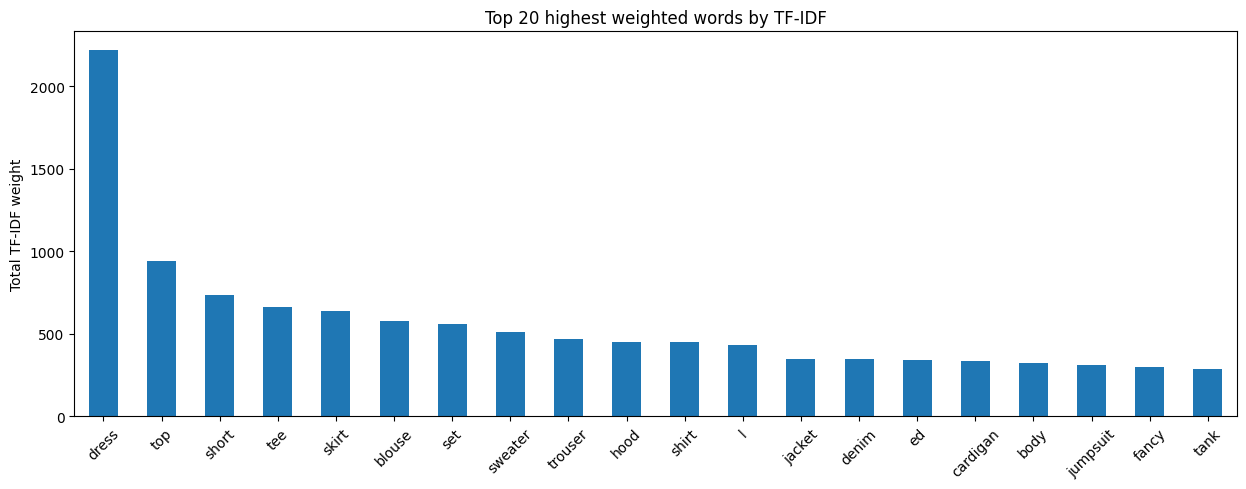

In [20]:
# Visualizing top 20 weighted words for product_name
word_counts = pd.DataFrame(
    {"counts": X_train_name_transformed.toarray().sum(axis=0)},
    index=tfidf_name.get_feature_names_out()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 highest weighted words by TF-IDF")
plt.ylabel('Total TF-IDF weight')
plt.xticks(rotation=45)
plt.show()

**Notes**

- We have dress as the most weighted word occuring in the product name
- We have all types of apparel types occuring in the most weighted 20 words.
- Top and bottom are also pretty evenly distributed with top 20 weighted words.

In [21]:
# Fitting tfidf for detailed description with Lemmatization
tfidf_desc = TfidfVectorizer(max_features=500,
                                 min_df=10,
                                 tokenizer=my_lemma_tokenizer,
                                 ngram_range=(1, 3))
tfidf_desc.fit(X_train_desc)

X_train_desc_transformed = tfidf_desc.transform(X_train_desc)
X_test_desc_transformed = tfidf_desc.transform(X_test_desc)

X_train_desc_transformed.shape

(28962, 500)

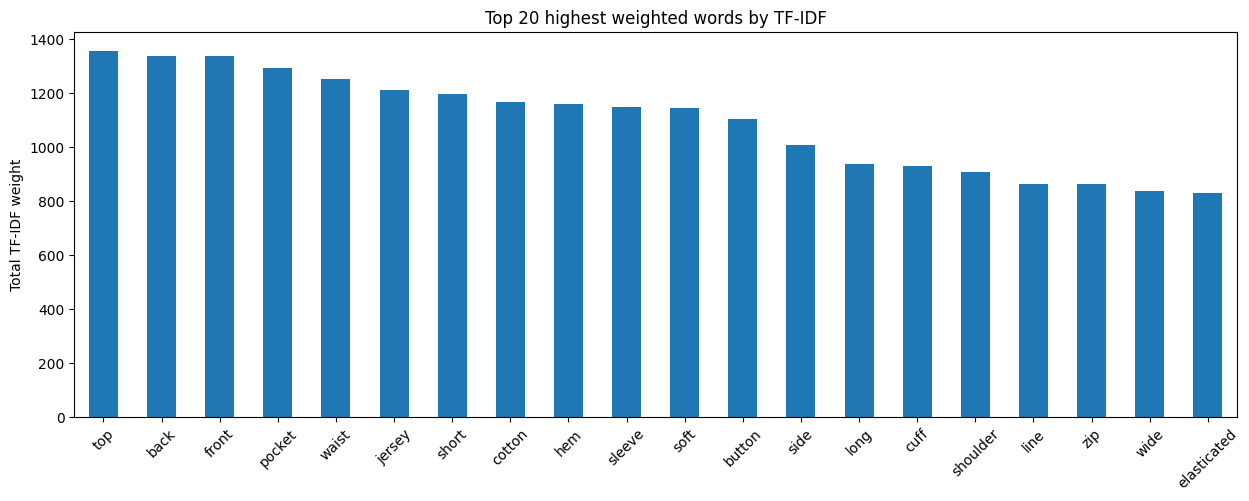

In [22]:
# Visualizing top 20 weighted words for detailed description
word_counts = pd.DataFrame(
    {"counts": X_train_desc_transformed.toarray().sum(axis=0)},
    index=tfidf_desc.get_feature_names_out()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 highest weighted words by TF-IDF")
plt.ylabel('Total TF-IDF weight')
plt.xticks(rotation=45)
plt.show()

- Here we can see a more evenly distributed weight for detailed description
- we can see some words with body parts: "waist", "shoulder", "back"
- we can see some words with fabrics and touch: "cotton", "soft", "elasticated"

**Combine Vectorized Columns with Others**

In [23]:
# Getting dfs with pos neg prefixes
X_train_name_df = pd.DataFrame(columns='name_'+tfidf_name.get_feature_names_out(),
                              data=X_train_name_transformed.toarray())
X_test_name_df = pd.DataFrame(columns='name_'+tfidf_name.get_feature_names_out(),
                             data=X_test_name_transformed.toarray())
X_train_desc_df = pd.DataFrame(columns='desc_'+tfidf_desc.get_feature_names_out(),
                              data=X_train_desc_transformed.toarray())
X_test_desc_df = pd.DataFrame(columns='desc_'+tfidf_desc.get_feature_names_out(),
                             data=X_test_desc_transformed.toarray())

print(X_train_name_df.shape, X_test_name_df.shape, X_train_desc_df.shape, X_test_desc_df.shape)

(28962, 500) (7241, 500) (28962, 500) (7241, 500)


In [24]:
X_train_df = pd.concat([X_train_name_df, X_train_desc_df, X_train_og.reset_index(drop=True)], axis=1)
X_test_df = pd.concat([X_test_name_df, X_test_desc_df, X_test_og.reset_index(drop=True)], axis=1)

print(X_train_df.shape, X_test_df.shape)

(28962, 1129) (7241, 1129)


# Baseline Modeling & Evaluation

## Logistic Regression - without description and product name

**Baseline**

To begin with, let's look at the baseline for this prediction tasks by looking at how much accuracy we would get by guessing all of them as positive (since we have slightly more positive reviews):

In [ ]:
y.value_counts(normalize=True)

trending
False    0.894152
True     0.105848
Name: proportion, dtype: float64

Our baseline accuracy is around 89.4%.

In [ ]:
X_train = np.array(X_train_df)
X_test = np.array(X_test_df)
y_train = np.array(y_train)
y_test = np.array(y_test)

# og- without product description and product name
X_train_og = np.array(X_train_og)
X_test_og = np.array(X_test_og)

Next we can fit the data to the logistic regression model:

**Fitting the Model**

In [ ]:
# Standard scaling the features
scaler = StandardScaler()
X_train_ss = scaler.fit_transform(X_train_og)
X_test_ss = scaler.transform(X_test_og)

# Fitting the model
logreg = LogisticRegression(random_state=123)
logreg.fit(X_train_ss, y_train)

# Training and test score
print(f"Train score: {logreg.score(X_train_ss, y_train)}")
print(f"Test score: {logreg.score(X_test_ss, y_test)}")

Train score: 0.8954492093087494
Test score: 0.8946278138378677


**Evaluating the Model**

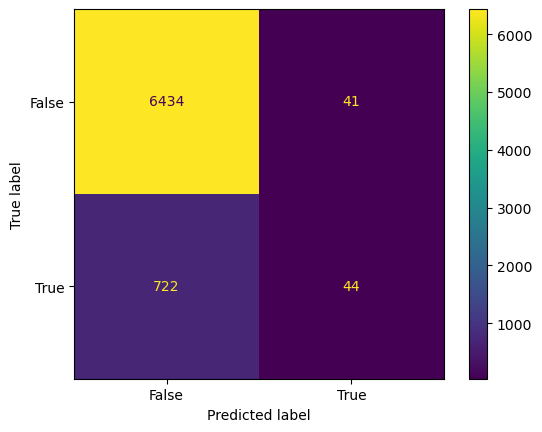

In [ ]:
# Evaluate with confusion matrix
ConfusionMatrixDisplay.from_estimator(logreg, X_test_ss, y_test)
plt.show()

In [ ]:
# evaluate on the original test set
y_pred = logreg.predict(X_test_ss)

# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.90      0.99      0.94      6475
        True       0.52      0.06      0.10       766

    accuracy                           0.89      7241
   macro avg       0.71      0.53      0.52      7241
weighted avg       0.86      0.89      0.86      7241



- In terms of precision, our model is correct 52% of the time when predicting trending items.
- Recall is quite low, the model only captures 0.06% of the trending items.

## Logistic Regression - with product name and detailed description

**Fitting the Model**

In [ ]:
# Standard scaling the features
scaler = StandardScaler()
X_train_ss = scaler.fit_transform(X_train)
X_test_ss = scaler.transform(X_test)

# Fitting the model
logreg = LogisticRegression(random_state=123)
logreg.fit(X_train_ss, y_train)

# Training and test score
print(f"Train score: {logreg.score(X_train_ss, y_train)}")
print(f"Test score: {logreg.score(X_test_ss, y_test)}")

Train score: 0.9137490504799393
Test score: 0.8933848915895595


**Evaluating the Model**

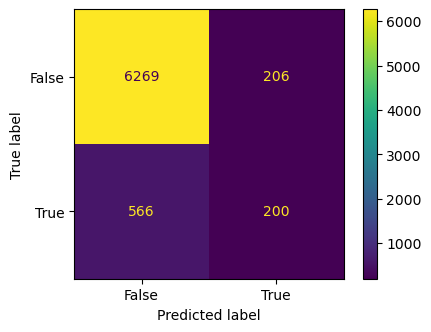

In [ ]:
# Evaluate with confusion matrix
ConfusionMatrixDisplay.from_estimator(logreg, X_test_ss, y_test)
plt.show()

In [ ]:
# evaluate on the original test set
y_pred = logreg.predict(X_test_ss)

# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.92      0.97      0.94      6475
        True       0.49      0.26      0.34       766

    accuracy                           0.89      7241
   macro avg       0.70      0.61      0.64      7241
weighted avg       0.87      0.89      0.88      7241



It looks like the logistic regression model (89.3%) is actually worse compared to the pure guessing baseline (89.4%). However,  the logreg is doing better by not classifying all items as non-trending.

Let's interpret these numbers, specifically the first row of the confusion matrix first:
* **TN**: The vast majority of data points are from class 0 that were correctly predicted as non-trending
* **FP**: 206 of non-trending items that we incorrectly classified as trending

Looking at the second column of the confusion matrix:

* **FN**: how many trending items were marked as non-trending?

- With product name and detailed description, recall is up by 20%!

## Imbalanced Learning

Since our data is imbalanced, it would be better if we had introduce some upsampling to our dataset.

**SMOTE**

In [ ]:
# Upsampling with SMOTE
from imblearn.over_sampling import SMOTE
sampler = SMOTE(random_state=123)
X_train_res, y_train_res = sampler.fit_resample(X_train, y_train)
print(X_train_res.shape, y_train_res.shape)

(51792, 1129) (51792,)


**Fitting the Model**

In [ ]:
# Standard scaling the features
scaler = StandardScaler()
X_train_ss = scaler.fit_transform(X_train_res)
X_test_ss = scaler.transform(X_test)

# Fitting the model
logreg = LogisticRegression(random_state=123)
logreg.fit(X_train_ss, y_train_res)

# Training and test score
print(f"Train score: {logreg.score(X_train_ss, y_train_res)}")
print(f"Test score: {logreg.score(X_test_ss, y_test)}")

Train score: 0.8692269076305221
Test score: 0.8091423836486673


**Evaluating the Model**

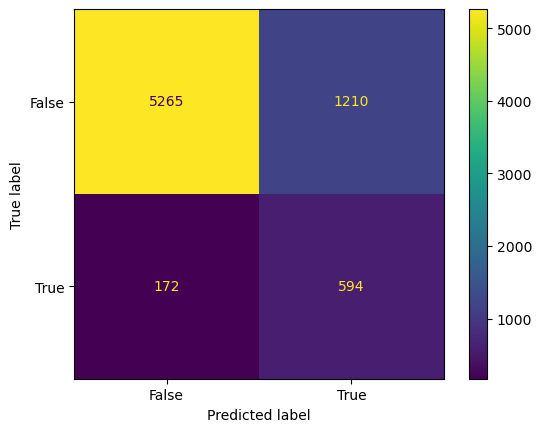

In [ ]:
# Evaluate with confusion matrix
ConfusionMatrixDisplay.from_estimator(logreg, X_test_ss, y_test)
plt.show()

In [ ]:
# evaluate on the original test set
y_pred = logreg.predict(X_test_ss)

# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.81      0.88      6475
        True       0.33      0.78      0.46       766

    accuracy                           0.81      7241
   macro avg       0.65      0.79      0.67      7241
weighted avg       0.90      0.81      0.84      7241



- Here we can see that we have a more satisfactory recall score, we can detect 78% of the trending items with this baseline model!

In [ ]:
def false_positive_rate(y_true, y_pred):

    false_positives = (y_true == 0) & (y_pred == 1) # find all values where y is negative
                                                    # but we predicted positive
    false_positive_number = false_positives.sum()

    true_negatives = (y_true == 0) & (y_pred == 0)  # find all values where y is negative
                                                    # and we predicted negative
    true_negative_number = true_negatives.sum()

    # Finally, find the ratio of (FP) to (TN + FP)
    FPR = false_positive_number/(true_negative_number + false_positive_number)

    return FPR
fpr = false_positive_rate(y_test, y_pred)
fpr

0.18687258687258687

- False positive rate here could be improved, but compared to a 52% increase in recall this is still acceptable.

## Feature Importance

**Top 20 features**

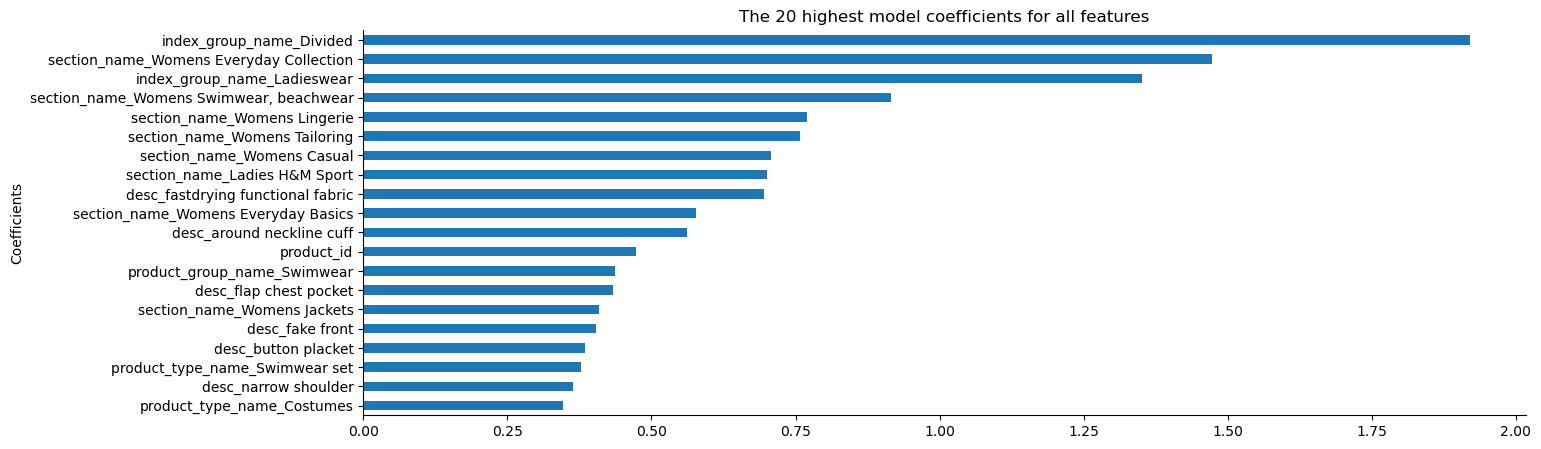

In [ ]:
# Get our logreg model coefs for each features and pass them into a dataframe
word_coefs = pd.DataFrame(
    {"coefficients": logreg.coef_[0]},
    index = X_train_df.columns
).sort_values("coefficients", ascending=False)

# Plotting out the top 20 model coefs
word_coefs.head(20).plot(kind="barh", figsize=(15, 5), legend=False)
plt.title("The 20 highest model coefficients for all features")
plt.ylabel("Coefficients")
plt.gca().invert_yaxis()
sns.despine()
plt.show()

- We can see that sections are appearing very frequently in the top 20 coefficients in our model, this is indicating that this variable has a higher impact in helping the model make correct predictions. We might want to consider adding more similar features with higher variance into our model. (ex. department_name)
- Here we can already pin point some of the index_group, section, product_type, and product description that has the most trending potentials. We can suggest stakeholders to look further into these categories.

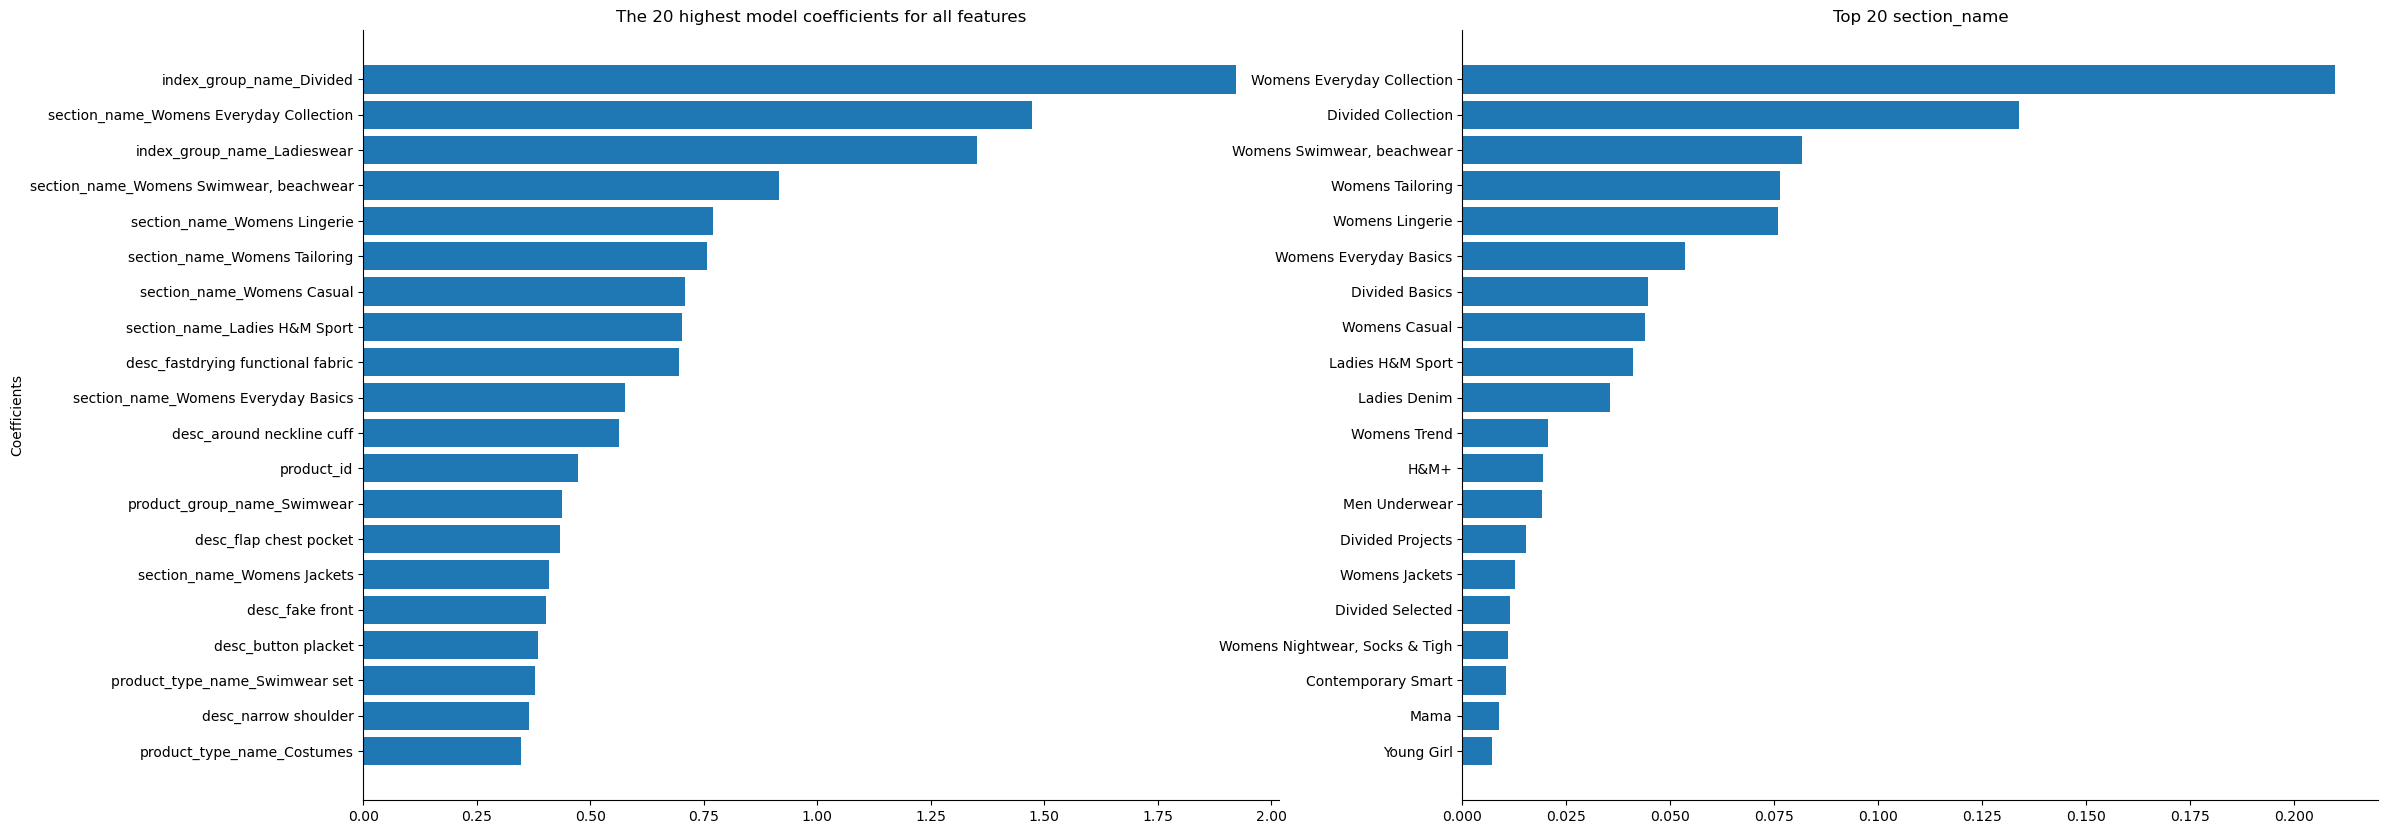

In [ ]:
plt.subplots(1,2, figsize=(26,10))

plt.subplot(1,2,1)
# Plotting out the top 20 model coefs
top_values = word_coefs.reset_index().head(20)
plt.barh(top_values.iloc[:,0], top_values.iloc[:,1])
plt.title("The 20 highest model coefficients for all features")
plt.ylabel("Coefficients")
plt.gca().invert_yaxis()
sns.despine()

plt.subplot(1,2,2)
col = 'section_name'
sec_values = hm_sales_processed[col].value_counts(normalize=True).head(20)
plt.barh(sec_values.index, sec_values.values)
plt.gca().invert_yaxis()
plt.title(f'Top 20 {col}')
sns.despine()

With these features with high coefficients, we can actually match with it from the top 20 selling section name, and pin point specific sections that have more trending natures.

**Top 20 detailed description**

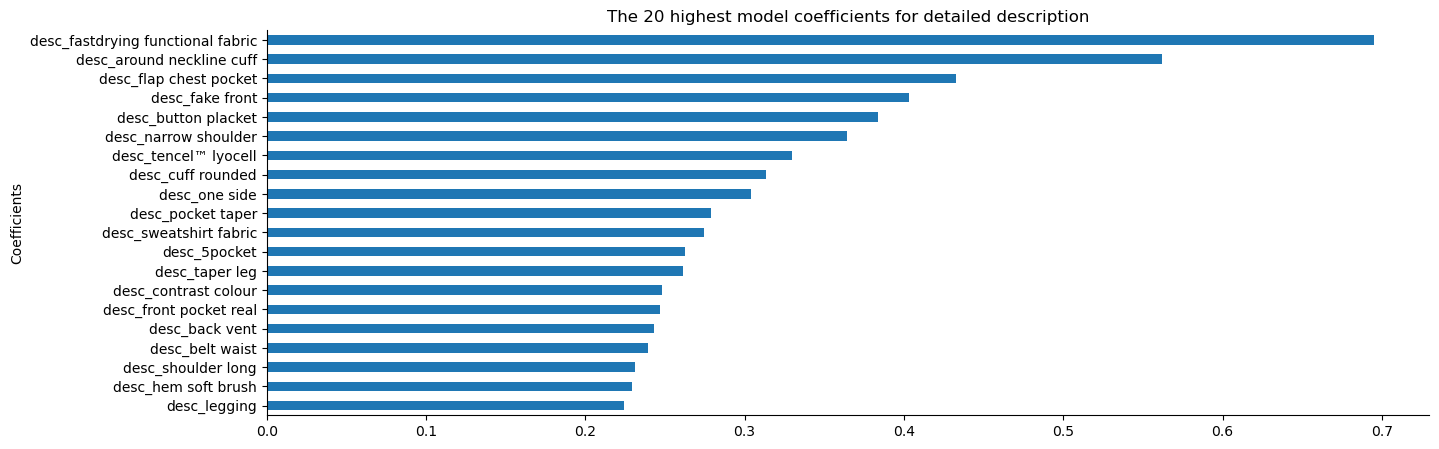

In [ ]:
# Filter only the index (columns) with "desc_" prefix
word_coefs_desc = word_coefs.T.filter(like='desc_').T

# Plotting out the top 20 model coefs
word_coefs_desc.head(20).plot(kind="barh", figsize=(15, 5), legend=False)
plt.title("The 20 highest model coefficients for detailed description")
plt.ylabel("Coefficients")
plt.gca().invert_yaxis()
sns.despine()
plt.show()

Here, we can also look at only the detailed product description:
- We can see body parts commonly occurs in the top 20 coefs, such as neckline, shoulder, leg, waist.
- Fabrics and pockets also seems to occur quite often.


**Next Steps**

- Compare more ML / NN models and optimize the precision / recall /f1 score.
- Do interpretable ML for the models.
- Try using word embeddings for product description and product name input, see if it's different from vectorizer.
